Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\mathe\OneDrive\Desktop\Web Phishing Detection\dataset_website.csv")
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
#Shape of dataframe

data.shape

(11055, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [6]:
# nunique value in columns

data.nunique()

index                          11055
having_IPhaving_IP_Address         2
URLURL_Length                      3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

In [7]:
#droping index column

data = data.drop(['index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IPhaving_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URLURL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


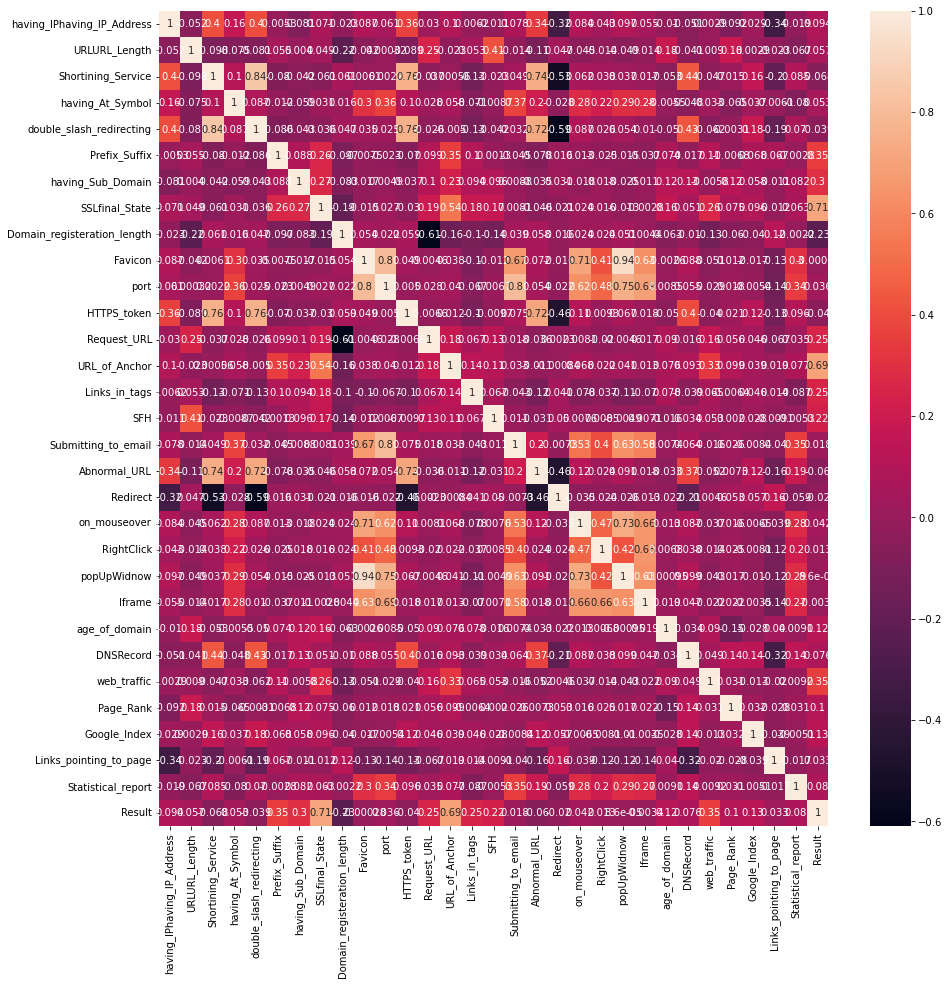

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

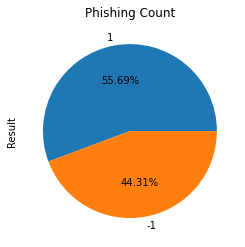

In [10]:
# Phishing Count in pie chart

data['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [11]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Result"],axis =1)
y = data["Result"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8844, 30), (8844,), (2211, 30), (2211,))

In [13]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

Logistic Regression

In [14]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [15]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [16]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.929
Logistic Regression : Accuracy on test Data: 0.924

Logistic Regression : f1_score on training Data: 0.937
Logistic Regression : f1_score on test Data: 0.933

Logistic Regression : Recall on training Data: 0.947
Logistic Regression : Recall on test Data: 0.939

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.928


In [17]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [18]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [19]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=2)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [20]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [21]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.977
K-Nearest Neighbors : Accuracy on test Data: 0.944

K-Nearest Neighbors : f1_score on training Data: 0.979
K-Nearest Neighbors : f1_score on test Data: 0.950

K-Nearest Neighborsn : Recall on training Data: 0.962
Logistic Regression : Recall on test Data: 0.929

K-Nearest Neighbors : precision on training Data: 0.996
K-Nearest Neighbors : precision on test Data: 0.971


In [22]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.91      0.96      0.94       956
           1       0.97      0.93      0.95      1255

    accuracy                           0.94      2211
   macro avg       0.94      0.95      0.94      2211
weighted avg       0.95      0.94      0.94      2211



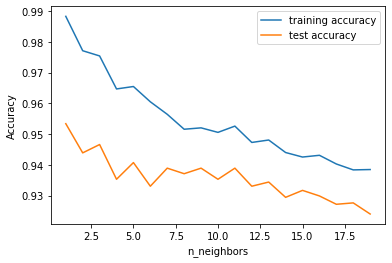

In [23]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [24]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [25]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [26]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [27]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.971
Support Vector Machine : Accuracy on test Data: 0.957

Support Vector Machine : f1_score on training Data: 0.974
Support Vector Machine : f1_score on test Data: 0.963

Support Vector Machine : Recall on training Data: 0.982
Support Vector Machine : Recall on test Data: 0.973

Support Vector Machine : precision on training Data: 0.966
Support Vector Machine : precision on test Data: 0.952


In [28]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [29]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [30]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [31]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [32]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.607
Naive Bayes Classifier : Accuracy on test Data: 0.583

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.420

Naive Bayes Classifier : Recall on training Data: 0.291
Naive Bayes Classifier : Recall on test Data: 0.266

Naive Bayes Classifier : precision on training Data: 0.996
Naive Bayes Classifier : precision on test Data: 0.997


In [33]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [34]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [35]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [36]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [37]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.959

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.964

Decision Tree : Recall on training Data: 0.992
Decision Tree : Recall on test Data: 0.966

Decision Tree : precision on training Data: 0.991
Decision Tree : precision on test Data: 0.962


In [38]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



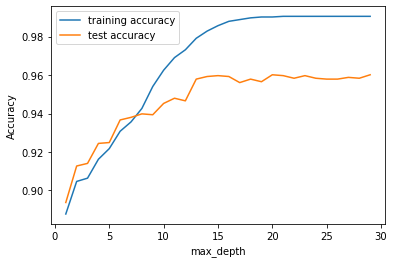

In [39]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [40]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [41]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [43]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.962

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.967

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.972

Random Forest : precision on training Data: 0.989
Random Forest : precision on test Data: 0.962


In [44]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       956
           1       0.96      0.97      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



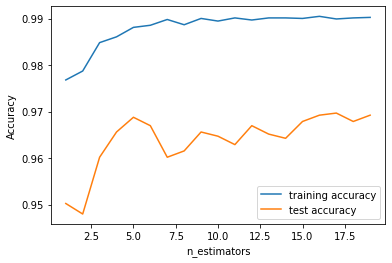

In [45]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [46]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [47]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [48]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [49]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.987
Gradient Boosting Classifier : Accuracy on test Data: 0.971

Gradient Boosting Classifier : f1_score on training Data: 0.989
Gradient Boosting Classifier : f1_score on test Data: 0.975

Gradient Boosting Classifier : Recall on training Data: 0.992
Gradient Boosting Classifier : Recall on test Data: 0.988

Gradient Boosting Classifier : precision on training Data: 0.985
Gradient Boosting Classifier : precision on test Data: 0.962


In [50]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       956
           1       0.96      0.99      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



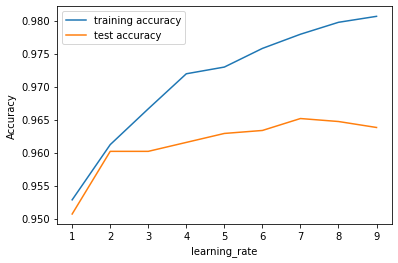

In [51]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

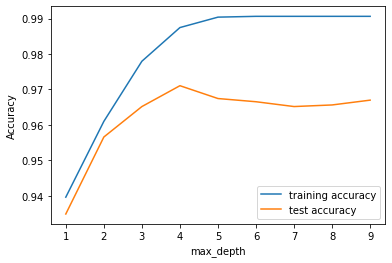

In [52]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [53]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [54]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5480538	total: 149ms	remaining: 2m 29s
1:	learn: 0.4337748	total: 154ms	remaining: 1m 16s
2:	learn: 0.3697514	total: 159ms	remaining: 52.7s
3:	learn: 0.3105084	total: 163ms	remaining: 40.6s
4:	learn: 0.2715007	total: 168ms	remaining: 33.4s
5:	learn: 0.2433223	total: 172ms	remaining: 28.5s
6:	learn: 0.2254893	total: 176ms	remaining: 25s
7:	learn: 0.2082963	total: 181ms	remaining: 22.5s
8:	learn: 0.1975992	total: 186ms	remaining: 20.5s
9:	learn: 0.1868770	total: 190ms	remaining: 18.9s
10:	learn: 0.1795134	total: 195ms	remaining: 17.5s
11:	learn: 0.1749100	total: 199ms	remaining: 16.4s
12:	learn: 0.1685586	total: 204ms	remaining: 15.5s
13:	learn: 0.1642018	total: 208ms	remaining: 14.7s
14:	learn: 0.1599999	total: 213ms	remaining: 14s
15:	learn: 0.1563166	total: 218ms	remaining: 13.4s
16:	learn: 0.1538434	total: 223ms	remaining: 12.9s
17:	learn: 0.1515084	total: 227ms	remaining: 12.4s
18:	learn: 0.1476302	total: 232ms	remaining: 12s
19:	learn: 0.1453111	total: 236ms	remaining: 

195:	learn: 0.0501936	total: 1.04s	remaining: 4.28s
196:	learn: 0.0501112	total: 1.05s	remaining: 4.28s
197:	learn: 0.0499960	total: 1.05s	remaining: 4.27s
198:	learn: 0.0498892	total: 1.06s	remaining: 4.26s
199:	learn: 0.0496267	total: 1.06s	remaining: 4.25s
200:	learn: 0.0496104	total: 1.07s	remaining: 4.24s
201:	learn: 0.0494922	total: 1.07s	remaining: 4.24s
202:	learn: 0.0493757	total: 1.08s	remaining: 4.23s
203:	learn: 0.0491855	total: 1.08s	remaining: 4.22s
204:	learn: 0.0490367	total: 1.08s	remaining: 4.21s
205:	learn: 0.0489342	total: 1.09s	remaining: 4.2s
206:	learn: 0.0488345	total: 1.09s	remaining: 4.19s
207:	learn: 0.0486681	total: 1.1s	remaining: 4.18s
208:	learn: 0.0485686	total: 1.1s	remaining: 4.17s
209:	learn: 0.0484591	total: 1.11s	remaining: 4.16s
210:	learn: 0.0483687	total: 1.11s	remaining: 4.16s
211:	learn: 0.0482179	total: 1.11s	remaining: 4.15s
212:	learn: 0.0481078	total: 1.12s	remaining: 4.14s
213:	learn: 0.0480970	total: 1.12s	remaining: 4.13s
214:	learn: 0.0

387:	learn: 0.0334000	total: 1.94s	remaining: 3.06s
388:	learn: 0.0333488	total: 1.95s	remaining: 3.07s
389:	learn: 0.0333199	total: 1.96s	remaining: 3.06s
390:	learn: 0.0332703	total: 1.96s	remaining: 3.06s
391:	learn: 0.0332488	total: 1.97s	remaining: 3.05s
392:	learn: 0.0331993	total: 1.97s	remaining: 3.05s
393:	learn: 0.0331993	total: 1.98s	remaining: 3.04s
394:	learn: 0.0331731	total: 1.98s	remaining: 3.04s
395:	learn: 0.0331152	total: 1.99s	remaining: 3.03s
396:	learn: 0.0330834	total: 1.99s	remaining: 3.02s
397:	learn: 0.0330138	total: 1.99s	remaining: 3.02s
398:	learn: 0.0329421	total: 2s	remaining: 3.01s
399:	learn: 0.0329113	total: 2s	remaining: 3s
400:	learn: 0.0328678	total: 2.01s	remaining: 3s
401:	learn: 0.0328514	total: 2.01s	remaining: 2.99s
402:	learn: 0.0327879	total: 2.02s	remaining: 2.99s
403:	learn: 0.0327236	total: 2.02s	remaining: 2.98s
404:	learn: 0.0327021	total: 2.03s	remaining: 2.98s
405:	learn: 0.0326819	total: 2.04s	remaining: 2.99s
406:	learn: 0.0326326	to

584:	learn: 0.0282644	total: 2.83s	remaining: 2.01s
585:	learn: 0.0282644	total: 2.83s	remaining: 2s
586:	learn: 0.0282644	total: 2.84s	remaining: 2s
587:	learn: 0.0282644	total: 2.84s	remaining: 1.99s
588:	learn: 0.0282644	total: 2.84s	remaining: 1.98s
589:	learn: 0.0282644	total: 2.85s	remaining: 1.98s
590:	learn: 0.0282644	total: 2.85s	remaining: 1.97s
591:	learn: 0.0282644	total: 2.85s	remaining: 1.97s
592:	learn: 0.0282644	total: 2.86s	remaining: 1.96s
593:	learn: 0.0282644	total: 2.86s	remaining: 1.96s
594:	learn: 0.0282644	total: 2.87s	remaining: 1.95s
595:	learn: 0.0282644	total: 2.87s	remaining: 1.94s
596:	learn: 0.0282644	total: 2.87s	remaining: 1.94s
597:	learn: 0.0282644	total: 2.88s	remaining: 1.93s
598:	learn: 0.0282644	total: 2.88s	remaining: 1.93s
599:	learn: 0.0282644	total: 2.88s	remaining: 1.92s
600:	learn: 0.0282644	total: 2.88s	remaining: 1.92s
601:	learn: 0.0282644	total: 2.89s	remaining: 1.91s
602:	learn: 0.0282644	total: 2.89s	remaining: 1.9s
603:	learn: 0.02826

766:	learn: 0.0268233	total: 3.54s	remaining: 1.07s
767:	learn: 0.0268002	total: 3.54s	remaining: 1.07s
768:	learn: 0.0267492	total: 3.55s	remaining: 1.06s
769:	learn: 0.0267205	total: 3.55s	remaining: 1.06s
770:	learn: 0.0266943	total: 3.56s	remaining: 1.06s
771:	learn: 0.0266698	total: 3.56s	remaining: 1.05s
772:	learn: 0.0266570	total: 3.56s	remaining: 1.05s
773:	learn: 0.0266420	total: 3.57s	remaining: 1.04s
774:	learn: 0.0266258	total: 3.57s	remaining: 1.04s
775:	learn: 0.0266095	total: 3.58s	remaining: 1.03s
776:	learn: 0.0266095	total: 3.58s	remaining: 1.03s
777:	learn: 0.0266095	total: 3.58s	remaining: 1.02s
778:	learn: 0.0265846	total: 3.59s	remaining: 1.02s
779:	learn: 0.0265846	total: 3.59s	remaining: 1.01s
780:	learn: 0.0265554	total: 3.6s	remaining: 1.01s
781:	learn: 0.0265554	total: 3.6s	remaining: 1s
782:	learn: 0.0265554	total: 3.6s	remaining: 999ms
783:	learn: 0.0265554	total: 3.61s	remaining: 994ms
784:	learn: 0.0265554	total: 3.61s	remaining: 989ms
785:	learn: 0.0265

952:	learn: 0.0260264	total: 4.25s	remaining: 209ms
953:	learn: 0.0260265	total: 4.25s	remaining: 205ms
954:	learn: 0.0260264	total: 4.25s	remaining: 200ms
955:	learn: 0.0260264	total: 4.26s	remaining: 196ms
956:	learn: 0.0260264	total: 4.26s	remaining: 192ms
957:	learn: 0.0260264	total: 4.27s	remaining: 187ms
958:	learn: 0.0260264	total: 4.27s	remaining: 183ms
959:	learn: 0.0260263	total: 4.27s	remaining: 178ms
960:	learn: 0.0260039	total: 4.28s	remaining: 174ms
961:	learn: 0.0260038	total: 4.28s	remaining: 169ms
962:	learn: 0.0260038	total: 4.29s	remaining: 165ms
963:	learn: 0.0260038	total: 4.29s	remaining: 160ms
964:	learn: 0.0260037	total: 4.29s	remaining: 156ms
965:	learn: 0.0260037	total: 4.29s	remaining: 151ms
966:	learn: 0.0260036	total: 4.3s	remaining: 147ms
967:	learn: 0.0260034	total: 4.3s	remaining: 142ms
968:	learn: 0.0260033	total: 4.31s	remaining: 138ms
969:	learn: 0.0260033	total: 4.31s	remaining: 133ms
970:	learn: 0.0260033	total: 4.31s	remaining: 129ms
971:	learn: 0.

In [56]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [57]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.990
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.991
CatBoost Classifier : f1_score on test Data: 0.976

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.988

CatBoost Classifier : precision on training Data: 0.987
CatBoost Classifier : precision on test Data: 0.964


In [58]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       956
           1       0.96      0.99      0.98      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [59]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))

0:	learn: 0.5480538	total: 3.8ms	remaining: 3.79s
1:	learn: 0.4337748	total: 8.21ms	remaining: 4.1s
2:	learn: 0.3697514	total: 12.8ms	remaining: 4.25s
3:	learn: 0.3105084	total: 18ms	remaining: 4.48s
4:	learn: 0.2715007	total: 22.8ms	remaining: 4.53s
5:	learn: 0.2433223	total: 27.3ms	remaining: 4.52s
6:	learn: 0.2254893	total: 32.2ms	remaining: 4.56s
7:	learn: 0.2082963	total: 36.9ms	remaining: 4.57s
8:	learn: 0.1975992	total: 41.6ms	remaining: 4.58s
9:	learn: 0.1868770	total: 46.3ms	remaining: 4.58s
10:	learn: 0.1795134	total: 50.9ms	remaining: 4.57s
11:	learn: 0.1749100	total: 55.7ms	remaining: 4.58s
12:	learn: 0.1685586	total: 60.4ms	remaining: 4.58s
13:	learn: 0.1642018	total: 64.7ms	remaining: 4.55s
14:	learn: 0.1599999	total: 68.6ms	remaining: 4.5s
15:	learn: 0.1563166	total: 72.5ms	remaining: 4.46s
16:	learn: 0.1538434	total: 76.2ms	remaining: 4.4s
17:	learn: 0.1515084	total: 80ms	remaining: 4.36s
18:	learn: 0.1476302	total: 83.8ms	remaining: 4.33s
19:	learn: 0.1453111	total: 87

167:	learn: 0.0548806	total: 715ms	remaining: 3.54s
168:	learn: 0.0546207	total: 720ms	remaining: 3.54s
169:	learn: 0.0544744	total: 724ms	remaining: 3.54s
170:	learn: 0.0542500	total: 729ms	remaining: 3.53s
171:	learn: 0.0540693	total: 734ms	remaining: 3.53s
172:	learn: 0.0538623	total: 738ms	remaining: 3.53s
173:	learn: 0.0537364	total: 743ms	remaining: 3.53s
174:	learn: 0.0536432	total: 748ms	remaining: 3.52s
175:	learn: 0.0534786	total: 752ms	remaining: 3.52s
176:	learn: 0.0532180	total: 756ms	remaining: 3.51s
177:	learn: 0.0528518	total: 760ms	remaining: 3.51s
178:	learn: 0.0526563	total: 764ms	remaining: 3.5s
179:	learn: 0.0525527	total: 768ms	remaining: 3.5s
180:	learn: 0.0524322	total: 772ms	remaining: 3.49s
181:	learn: 0.0522636	total: 777ms	remaining: 3.49s
182:	learn: 0.0521263	total: 781ms	remaining: 3.48s
183:	learn: 0.0520370	total: 785ms	remaining: 3.48s
184:	learn: 0.0518513	total: 789ms	remaining: 3.48s
185:	learn: 0.0517435	total: 793ms	remaining: 3.47s
186:	learn: 0.

367:	learn: 0.0345439	total: 1.61s	remaining: 2.76s
368:	learn: 0.0344700	total: 1.61s	remaining: 2.75s
369:	learn: 0.0344131	total: 1.61s	remaining: 2.75s
370:	learn: 0.0343867	total: 1.62s	remaining: 2.75s
371:	learn: 0.0343265	total: 1.62s	remaining: 2.74s
372:	learn: 0.0342398	total: 1.63s	remaining: 2.74s
373:	learn: 0.0341798	total: 1.63s	remaining: 2.73s
374:	learn: 0.0341053	total: 1.64s	remaining: 2.73s
375:	learn: 0.0340509	total: 1.64s	remaining: 2.72s
376:	learn: 0.0339850	total: 1.65s	remaining: 2.72s
377:	learn: 0.0339100	total: 1.65s	remaining: 2.71s
378:	learn: 0.0338534	total: 1.65s	remaining: 2.71s
379:	learn: 0.0337912	total: 1.66s	remaining: 2.71s
380:	learn: 0.0337197	total: 1.66s	remaining: 2.7s
381:	learn: 0.0336963	total: 1.67s	remaining: 2.7s
382:	learn: 0.0336240	total: 1.67s	remaining: 2.69s
383:	learn: 0.0335985	total: 1.68s	remaining: 2.69s
384:	learn: 0.0335471	total: 1.68s	remaining: 2.68s
385:	learn: 0.0335055	total: 1.68s	remaining: 2.68s
386:	learn: 0.

529:	learn: 0.0294331	total: 2.31s	remaining: 2.05s
530:	learn: 0.0293963	total: 2.32s	remaining: 2.05s
531:	learn: 0.0293963	total: 2.33s	remaining: 2.04s
532:	learn: 0.0293817	total: 2.33s	remaining: 2.04s
533:	learn: 0.0293742	total: 2.33s	remaining: 2.04s
534:	learn: 0.0293538	total: 2.34s	remaining: 2.03s
535:	learn: 0.0293179	total: 2.35s	remaining: 2.03s
536:	learn: 0.0292872	total: 2.35s	remaining: 2.02s
537:	learn: 0.0292651	total: 2.35s	remaining: 2.02s
538:	learn: 0.0292397	total: 2.36s	remaining: 2.02s
539:	learn: 0.0292252	total: 2.36s	remaining: 2.01s
540:	learn: 0.0291830	total: 2.37s	remaining: 2.01s
541:	learn: 0.0291585	total: 2.37s	remaining: 2s
542:	learn: 0.0291480	total: 2.38s	remaining: 2s
543:	learn: 0.0291365	total: 2.38s	remaining: 2s
544:	learn: 0.0291115	total: 2.39s	remaining: 1.99s
545:	learn: 0.0290622	total: 2.39s	remaining: 1.99s
546:	learn: 0.0290212	total: 2.4s	remaining: 1.98s
547:	learn: 0.0290212	total: 2.4s	remaining: 1.98s
548:	learn: 0.0290211	t

714:	learn: 0.0271759	total: 3.03s	remaining: 1.21s
715:	learn: 0.0271733	total: 3.03s	remaining: 1.2s
716:	learn: 0.0271565	total: 3.03s	remaining: 1.2s
717:	learn: 0.0271531	total: 3.04s	remaining: 1.19s
718:	learn: 0.0271531	total: 3.04s	remaining: 1.19s
719:	learn: 0.0271531	total: 3.04s	remaining: 1.18s
720:	learn: 0.0271528	total: 3.05s	remaining: 1.18s
721:	learn: 0.0271383	total: 3.05s	remaining: 1.18s
722:	learn: 0.0270961	total: 3.06s	remaining: 1.17s
723:	learn: 0.0270960	total: 3.06s	remaining: 1.17s
724:	learn: 0.0270960	total: 3.06s	remaining: 1.16s
725:	learn: 0.0270941	total: 3.07s	remaining: 1.16s
726:	learn: 0.0270761	total: 3.07s	remaining: 1.15s
727:	learn: 0.0270378	total: 3.08s	remaining: 1.15s
728:	learn: 0.0270163	total: 3.08s	remaining: 1.15s
729:	learn: 0.0269752	total: 3.09s	remaining: 1.14s
730:	learn: 0.0269752	total: 3.09s	remaining: 1.14s
731:	learn: 0.0269752	total: 3.09s	remaining: 1.13s
732:	learn: 0.0269752	total: 3.1s	remaining: 1.13s
733:	learn: 0.0

897:	learn: 0.0261290	total: 3.74s	remaining: 425ms
898:	learn: 0.0261288	total: 3.74s	remaining: 421ms
899:	learn: 0.0261288	total: 3.75s	remaining: 416ms
900:	learn: 0.0261287	total: 3.75s	remaining: 412ms
901:	learn: 0.0261287	total: 3.75s	remaining: 408ms
902:	learn: 0.0261287	total: 3.76s	remaining: 404ms
903:	learn: 0.0261286	total: 3.76s	remaining: 399ms
904:	learn: 0.0261286	total: 3.77s	remaining: 396ms
905:	learn: 0.0261286	total: 3.77s	remaining: 391ms
906:	learn: 0.0261285	total: 3.78s	remaining: 387ms
907:	learn: 0.0261285	total: 3.78s	remaining: 383ms
908:	learn: 0.0261286	total: 3.78s	remaining: 379ms
909:	learn: 0.0261285	total: 3.79s	remaining: 375ms
910:	learn: 0.0261281	total: 3.79s	remaining: 370ms
911:	learn: 0.0261159	total: 3.79s	remaining: 366ms
912:	learn: 0.0261016	total: 3.8s	remaining: 362ms
913:	learn: 0.0260905	total: 3.8s	remaining: 358ms
914:	learn: 0.0260905	total: 3.81s	remaining: 354ms
915:	learn: 0.0260905	total: 3.81s	remaining: 350ms
916:	learn: 0.

65:	learn: 0.0642211	total: 285ms	remaining: 4.04s
66:	learn: 0.0629127	total: 290ms	remaining: 4.04s
67:	learn: 0.0616762	total: 294ms	remaining: 4.03s
68:	learn: 0.0609875	total: 299ms	remaining: 4.03s
69:	learn: 0.0604796	total: 304ms	remaining: 4.03s
70:	learn: 0.0600990	total: 308ms	remaining: 4.03s
71:	learn: 0.0596152	total: 312ms	remaining: 4.02s
72:	learn: 0.0591821	total: 316ms	remaining: 4.02s
73:	learn: 0.0589213	total: 320ms	remaining: 4.01s
74:	learn: 0.0583042	total: 325ms	remaining: 4s
75:	learn: 0.0578563	total: 329ms	remaining: 4s
76:	learn: 0.0574396	total: 333ms	remaining: 3.99s
77:	learn: 0.0571643	total: 337ms	remaining: 3.98s
78:	learn: 0.0567062	total: 341ms	remaining: 3.98s
79:	learn: 0.0563956	total: 345ms	remaining: 3.97s
80:	learn: 0.0558465	total: 349ms	remaining: 3.96s
81:	learn: 0.0552608	total: 354ms	remaining: 3.96s
82:	learn: 0.0550187	total: 358ms	remaining: 3.96s
83:	learn: 0.0546269	total: 362ms	remaining: 3.95s
84:	learn: 0.0543858	total: 366ms	rem

248:	learn: 0.0342257	total: 999ms	remaining: 3.01s
249:	learn: 0.0342252	total: 1s	remaining: 3.01s
250:	learn: 0.0342252	total: 1.01s	remaining: 3s
251:	learn: 0.0342253	total: 1.01s	remaining: 3s
252:	learn: 0.0342253	total: 1.01s	remaining: 2.99s
253:	learn: 0.0340730	total: 1.02s	remaining: 2.99s
254:	learn: 0.0339590	total: 1.02s	remaining: 2.98s
255:	learn: 0.0337626	total: 1.02s	remaining: 2.98s
256:	learn: 0.0336632	total: 1.03s	remaining: 2.98s
257:	learn: 0.0335842	total: 1.03s	remaining: 2.97s
258:	learn: 0.0334814	total: 1.04s	remaining: 2.97s
259:	learn: 0.0333441	total: 1.04s	remaining: 2.97s
260:	learn: 0.0332052	total: 1.05s	remaining: 2.96s
261:	learn: 0.0331627	total: 1.05s	remaining: 2.96s
262:	learn: 0.0330214	total: 1.05s	remaining: 2.96s
263:	learn: 0.0329074	total: 1.06s	remaining: 2.96s
264:	learn: 0.0328719	total: 1.06s	remaining: 2.95s
265:	learn: 0.0326413	total: 1.07s	remaining: 2.95s
266:	learn: 0.0324816	total: 1.07s	remaining: 2.95s
267:	learn: 0.0324392

428:	learn: 0.0275669	total: 1.71s	remaining: 2.28s
429:	learn: 0.0275389	total: 1.72s	remaining: 2.28s
430:	learn: 0.0274927	total: 1.72s	remaining: 2.27s
431:	learn: 0.0274927	total: 1.73s	remaining: 2.27s
432:	learn: 0.0274927	total: 1.73s	remaining: 2.27s
433:	learn: 0.0274926	total: 1.73s	remaining: 2.26s
434:	learn: 0.0274926	total: 1.74s	remaining: 2.26s
435:	learn: 0.0274925	total: 1.74s	remaining: 2.25s
436:	learn: 0.0274925	total: 1.74s	remaining: 2.25s
437:	learn: 0.0274925	total: 1.75s	remaining: 2.24s
438:	learn: 0.0274924	total: 1.75s	remaining: 2.24s
439:	learn: 0.0274924	total: 1.75s	remaining: 2.23s
440:	learn: 0.0274924	total: 1.76s	remaining: 2.23s
441:	learn: 0.0274923	total: 1.76s	remaining: 2.22s
442:	learn: 0.0274924	total: 1.76s	remaining: 2.22s
443:	learn: 0.0274495	total: 1.77s	remaining: 2.21s
444:	learn: 0.0274494	total: 1.77s	remaining: 2.21s
445:	learn: 0.0274249	total: 1.77s	remaining: 2.21s
446:	learn: 0.0273893	total: 1.78s	remaining: 2.2s
447:	learn: 0

623:	learn: 0.0259919	total: 2.42s	remaining: 1.46s
624:	learn: 0.0259919	total: 2.43s	remaining: 1.46s
625:	learn: 0.0259918	total: 2.43s	remaining: 1.45s
626:	learn: 0.0259918	total: 2.44s	remaining: 1.45s
627:	learn: 0.0259917	total: 2.44s	remaining: 1.45s
628:	learn: 0.0259916	total: 2.44s	remaining: 1.44s
629:	learn: 0.0259915	total: 2.45s	remaining: 1.44s
630:	learn: 0.0259915	total: 2.45s	remaining: 1.43s
631:	learn: 0.0259915	total: 2.45s	remaining: 1.43s
632:	learn: 0.0259914	total: 2.46s	remaining: 1.43s
633:	learn: 0.0259914	total: 2.46s	remaining: 1.42s
634:	learn: 0.0259913	total: 2.46s	remaining: 1.42s
635:	learn: 0.0259912	total: 2.47s	remaining: 1.41s
636:	learn: 0.0259625	total: 2.47s	remaining: 1.41s
637:	learn: 0.0259262	total: 2.48s	remaining: 1.41s
638:	learn: 0.0258918	total: 2.48s	remaining: 1.4s
639:	learn: 0.0258919	total: 2.48s	remaining: 1.4s
640:	learn: 0.0258304	total: 2.49s	remaining: 1.39s
641:	learn: 0.0257245	total: 2.49s	remaining: 1.39s
642:	learn: 0.

816:	learn: 0.0250149	total: 3.14s	remaining: 703ms
817:	learn: 0.0250148	total: 3.14s	remaining: 699ms
818:	learn: 0.0250148	total: 3.14s	remaining: 695ms
819:	learn: 0.0250147	total: 3.15s	remaining: 691ms
820:	learn: 0.0250148	total: 3.15s	remaining: 687ms
821:	learn: 0.0250148	total: 3.15s	remaining: 683ms
822:	learn: 0.0250147	total: 3.16s	remaining: 679ms
823:	learn: 0.0250147	total: 3.16s	remaining: 675ms
824:	learn: 0.0250146	total: 3.17s	remaining: 671ms
825:	learn: 0.0250146	total: 3.17s	remaining: 667ms
826:	learn: 0.0250146	total: 3.17s	remaining: 664ms
827:	learn: 0.0250146	total: 3.17s	remaining: 660ms
828:	learn: 0.0250145	total: 3.18s	remaining: 656ms
829:	learn: 0.0250145	total: 3.18s	remaining: 652ms
830:	learn: 0.0250144	total: 3.18s	remaining: 648ms
831:	learn: 0.0250144	total: 3.19s	remaining: 644ms
832:	learn: 0.0250144	total: 3.19s	remaining: 640ms
833:	learn: 0.0250144	total: 3.19s	remaining: 636ms
834:	learn: 0.0250144	total: 3.2s	remaining: 632ms
835:	learn: 0

5:	learn: 0.1548164	total: 25.5ms	remaining: 4.22s
6:	learn: 0.1469649	total: 29.9ms	remaining: 4.25s
7:	learn: 0.1419981	total: 34.5ms	remaining: 4.27s
8:	learn: 0.1342789	total: 39.4ms	remaining: 4.33s
9:	learn: 0.1279843	total: 43.9ms	remaining: 4.35s
10:	learn: 0.1240877	total: 48.2ms	remaining: 4.33s
11:	learn: 0.1194540	total: 52.1ms	remaining: 4.29s
12:	learn: 0.1159270	total: 56.2ms	remaining: 4.27s
13:	learn: 0.1117411	total: 60.3ms	remaining: 4.25s
14:	learn: 0.1084598	total: 64.4ms	remaining: 4.23s
15:	learn: 0.1062195	total: 68.6ms	remaining: 4.22s
16:	learn: 0.1029262	total: 72.8ms	remaining: 4.21s
17:	learn: 0.1009609	total: 76.9ms	remaining: 4.19s
18:	learn: 0.0987993	total: 81.1ms	remaining: 4.19s
19:	learn: 0.0971322	total: 85.4ms	remaining: 4.18s
20:	learn: 0.0953029	total: 89.6ms	remaining: 4.17s
21:	learn: 0.0934541	total: 93.7ms	remaining: 4.17s
22:	learn: 0.0915766	total: 98ms	remaining: 4.16s
23:	learn: 0.0895470	total: 102ms	remaining: 4.15s
24:	learn: 0.0879698

168:	learn: 0.0286427	total: 741ms	remaining: 3.64s
169:	learn: 0.0284766	total: 746ms	remaining: 3.64s
170:	learn: 0.0284064	total: 751ms	remaining: 3.64s
171:	learn: 0.0283198	total: 755ms	remaining: 3.64s
172:	learn: 0.0282642	total: 760ms	remaining: 3.63s
173:	learn: 0.0282257	total: 765ms	remaining: 3.63s
174:	learn: 0.0281477	total: 769ms	remaining: 3.63s
175:	learn: 0.0280711	total: 774ms	remaining: 3.62s
176:	learn: 0.0279877	total: 778ms	remaining: 3.62s
177:	learn: 0.0278590	total: 782ms	remaining: 3.61s
178:	learn: 0.0278321	total: 787ms	remaining: 3.61s
179:	learn: 0.0277685	total: 791ms	remaining: 3.6s
180:	learn: 0.0277108	total: 795ms	remaining: 3.6s
181:	learn: 0.0277108	total: 799ms	remaining: 3.59s
182:	learn: 0.0277107	total: 802ms	remaining: 3.58s
183:	learn: 0.0277107	total: 806ms	remaining: 3.57s
184:	learn: 0.0277106	total: 810ms	remaining: 3.57s
185:	learn: 0.0277105	total: 813ms	remaining: 3.56s
186:	learn: 0.0276666	total: 817ms	remaining: 3.55s
187:	learn: 0.

348:	learn: 0.0249001	total: 1.45s	remaining: 2.7s
349:	learn: 0.0249000	total: 1.45s	remaining: 2.7s
350:	learn: 0.0249000	total: 1.46s	remaining: 2.69s
351:	learn: 0.0248999	total: 1.46s	remaining: 2.69s
352:	learn: 0.0248450	total: 1.47s	remaining: 2.69s
353:	learn: 0.0248169	total: 1.47s	remaining: 2.68s
354:	learn: 0.0247868	total: 1.47s	remaining: 2.68s
355:	learn: 0.0247868	total: 1.48s	remaining: 2.67s
356:	learn: 0.0247868	total: 1.48s	remaining: 2.67s
357:	learn: 0.0247866	total: 1.49s	remaining: 2.66s
358:	learn: 0.0247867	total: 1.49s	remaining: 2.66s
359:	learn: 0.0247865	total: 1.49s	remaining: 2.65s
360:	learn: 0.0247865	total: 1.5s	remaining: 2.65s
361:	learn: 0.0247864	total: 1.5s	remaining: 2.64s
362:	learn: 0.0247864	total: 1.5s	remaining: 2.64s
363:	learn: 0.0247863	total: 1.51s	remaining: 2.63s
364:	learn: 0.0247864	total: 1.51s	remaining: 2.63s
365:	learn: 0.0247862	total: 1.51s	remaining: 2.62s
366:	learn: 0.0247854	total: 1.52s	remaining: 2.62s
367:	learn: 0.024

547:	learn: 0.0246582	total: 2.15s	remaining: 1.78s
548:	learn: 0.0246582	total: 2.16s	remaining: 1.77s
549:	learn: 0.0246583	total: 2.16s	remaining: 1.77s
550:	learn: 0.0246581	total: 2.17s	remaining: 1.77s
551:	learn: 0.0246579	total: 2.17s	remaining: 1.76s
552:	learn: 0.0246577	total: 2.17s	remaining: 1.76s
553:	learn: 0.0246577	total: 2.18s	remaining: 1.75s
554:	learn: 0.0246576	total: 2.18s	remaining: 1.75s
555:	learn: 0.0246575	total: 2.19s	remaining: 1.75s
556:	learn: 0.0246575	total: 2.19s	remaining: 1.74s
557:	learn: 0.0246575	total: 2.19s	remaining: 1.74s
558:	learn: 0.0246575	total: 2.19s	remaining: 1.73s
559:	learn: 0.0246574	total: 2.2s	remaining: 1.73s
560:	learn: 0.0246572	total: 2.2s	remaining: 1.72s
561:	learn: 0.0246572	total: 2.21s	remaining: 1.72s
562:	learn: 0.0246572	total: 2.21s	remaining: 1.71s
563:	learn: 0.0246571	total: 2.21s	remaining: 1.71s
564:	learn: 0.0246570	total: 2.22s	remaining: 1.71s
565:	learn: 0.0246569	total: 2.22s	remaining: 1.7s
566:	learn: 0.0

745:	learn: 0.0243618	total: 2.86s	remaining: 975ms
746:	learn: 0.0243617	total: 2.87s	remaining: 971ms
747:	learn: 0.0243616	total: 2.87s	remaining: 968ms
748:	learn: 0.0243615	total: 2.88s	remaining: 964ms
749:	learn: 0.0243615	total: 2.88s	remaining: 960ms
750:	learn: 0.0243615	total: 2.88s	remaining: 956ms
751:	learn: 0.0243614	total: 2.89s	remaining: 952ms
752:	learn: 0.0243609	total: 2.89s	remaining: 949ms
753:	learn: 0.0243610	total: 2.9s	remaining: 945ms
754:	learn: 0.0243609	total: 2.9s	remaining: 941ms
755:	learn: 0.0243610	total: 2.9s	remaining: 937ms
756:	learn: 0.0243610	total: 2.91s	remaining: 933ms
757:	learn: 0.0243608	total: 2.91s	remaining: 929ms
758:	learn: 0.0243608	total: 2.91s	remaining: 925ms
759:	learn: 0.0243607	total: 2.92s	remaining: 921ms
760:	learn: 0.0243606	total: 2.92s	remaining: 917ms
761:	learn: 0.0243606	total: 2.92s	remaining: 913ms
762:	learn: 0.0243605	total: 2.93s	remaining: 909ms
763:	learn: 0.0243604	total: 2.93s	remaining: 905ms
764:	learn: 0.0

944:	learn: 0.0242824	total: 3.57s	remaining: 208ms
945:	learn: 0.0242824	total: 3.58s	remaining: 204ms
946:	learn: 0.0242824	total: 3.58s	remaining: 200ms
947:	learn: 0.0242824	total: 3.58s	remaining: 197ms
948:	learn: 0.0242823	total: 3.59s	remaining: 193ms
949:	learn: 0.0242823	total: 3.59s	remaining: 189ms
950:	learn: 0.0242823	total: 3.6s	remaining: 185ms
951:	learn: 0.0242823	total: 3.6s	remaining: 181ms
952:	learn: 0.0242822	total: 3.6s	remaining: 178ms
953:	learn: 0.0242822	total: 3.6s	remaining: 174ms
954:	learn: 0.0242821	total: 3.61s	remaining: 170ms
955:	learn: 0.0242822	total: 3.61s	remaining: 166ms
956:	learn: 0.0242821	total: 3.62s	remaining: 162ms
957:	learn: 0.0242821	total: 3.62s	remaining: 159ms
958:	learn: 0.0242820	total: 3.62s	remaining: 155ms
959:	learn: 0.0242820	total: 3.63s	remaining: 151ms
960:	learn: 0.0242820	total: 3.63s	remaining: 147ms
961:	learn: 0.0242820	total: 3.63s	remaining: 144ms
962:	learn: 0.0242819	total: 3.64s	remaining: 140ms
963:	learn: 0.02

105:	learn: 0.0310440	total: 473ms	remaining: 3.99s
106:	learn: 0.0308071	total: 478ms	remaining: 3.99s
107:	learn: 0.0307220	total: 483ms	remaining: 3.99s
108:	learn: 0.0305805	total: 488ms	remaining: 3.99s
109:	learn: 0.0305227	total: 493ms	remaining: 3.99s
110:	learn: 0.0304625	total: 498ms	remaining: 3.99s
111:	learn: 0.0302630	total: 502ms	remaining: 3.98s
112:	learn: 0.0301368	total: 507ms	remaining: 3.98s
113:	learn: 0.0299877	total: 511ms	remaining: 3.97s
114:	learn: 0.0298463	total: 515ms	remaining: 3.97s
115:	learn: 0.0297919	total: 520ms	remaining: 3.96s
116:	learn: 0.0296579	total: 524ms	remaining: 3.96s
117:	learn: 0.0294078	total: 528ms	remaining: 3.95s
118:	learn: 0.0293084	total: 533ms	remaining: 3.94s
119:	learn: 0.0290517	total: 537ms	remaining: 3.94s
120:	learn: 0.0289553	total: 541ms	remaining: 3.93s
121:	learn: 0.0287689	total: 545ms	remaining: 3.92s
122:	learn: 0.0285726	total: 550ms	remaining: 3.92s
123:	learn: 0.0284541	total: 554ms	remaining: 3.92s
124:	learn: 

290:	learn: 0.0245162	total: 1.18s	remaining: 2.89s
291:	learn: 0.0245159	total: 1.19s	remaining: 2.88s
292:	learn: 0.0245158	total: 1.19s	remaining: 2.88s
293:	learn: 0.0245159	total: 1.2s	remaining: 2.87s
294:	learn: 0.0245156	total: 1.2s	remaining: 2.87s
295:	learn: 0.0245155	total: 1.2s	remaining: 2.86s
296:	learn: 0.0245153	total: 1.21s	remaining: 2.86s
297:	learn: 0.0245151	total: 1.21s	remaining: 2.85s
298:	learn: 0.0245149	total: 1.21s	remaining: 2.85s
299:	learn: 0.0245148	total: 1.22s	remaining: 2.84s
300:	learn: 0.0245146	total: 1.22s	remaining: 2.84s
301:	learn: 0.0245147	total: 1.23s	remaining: 2.83s
302:	learn: 0.0245146	total: 1.23s	remaining: 2.83s
303:	learn: 0.0245144	total: 1.23s	remaining: 2.82s
304:	learn: 0.0245144	total: 1.24s	remaining: 2.82s
305:	learn: 0.0245144	total: 1.24s	remaining: 2.81s
306:	learn: 0.0245144	total: 1.24s	remaining: 2.81s
307:	learn: 0.0245143	total: 1.25s	remaining: 2.8s
308:	learn: 0.0245143	total: 1.25s	remaining: 2.8s
309:	learn: 0.024

484:	learn: 0.0236967	total: 1.89s	remaining: 2s
485:	learn: 0.0236965	total: 1.89s	remaining: 2s
486:	learn: 0.0236965	total: 1.89s	remaining: 1.99s
487:	learn: 0.0236964	total: 1.9s	remaining: 1.99s
488:	learn: 0.0236963	total: 1.9s	remaining: 1.99s
489:	learn: 0.0236963	total: 1.91s	remaining: 1.98s
490:	learn: 0.0236963	total: 1.91s	remaining: 1.98s
491:	learn: 0.0236955	total: 1.91s	remaining: 1.98s
492:	learn: 0.0236954	total: 1.92s	remaining: 1.97s
493:	learn: 0.0236953	total: 1.92s	remaining: 1.97s
494:	learn: 0.0236953	total: 1.92s	remaining: 1.96s
495:	learn: 0.0236954	total: 1.93s	remaining: 1.96s
496:	learn: 0.0236949	total: 1.93s	remaining: 1.96s
497:	learn: 0.0236949	total: 1.94s	remaining: 1.95s
498:	learn: 0.0236949	total: 1.94s	remaining: 1.95s
499:	learn: 0.0236948	total: 1.94s	remaining: 1.94s
500:	learn: 0.0236947	total: 1.95s	remaining: 1.94s
501:	learn: 0.0236945	total: 1.95s	remaining: 1.94s
502:	learn: 0.0236945	total: 1.95s	remaining: 1.93s
503:	learn: 0.023694

680:	learn: 0.0233045	total: 2.6s	remaining: 1.22s
681:	learn: 0.0233045	total: 2.6s	remaining: 1.21s
682:	learn: 0.0233045	total: 2.6s	remaining: 1.21s
683:	learn: 0.0233045	total: 2.61s	remaining: 1.21s
684:	learn: 0.0233045	total: 2.61s	remaining: 1.2s
685:	learn: 0.0233045	total: 2.62s	remaining: 1.2s
686:	learn: 0.0233045	total: 2.62s	remaining: 1.19s
687:	learn: 0.0233045	total: 2.62s	remaining: 1.19s
688:	learn: 0.0233045	total: 2.63s	remaining: 1.19s
689:	learn: 0.0233045	total: 2.63s	remaining: 1.18s
690:	learn: 0.0233045	total: 2.63s	remaining: 1.18s
691:	learn: 0.0233045	total: 2.64s	remaining: 1.17s
692:	learn: 0.0233045	total: 2.64s	remaining: 1.17s
693:	learn: 0.0233045	total: 2.65s	remaining: 1.17s
694:	learn: 0.0233045	total: 2.65s	remaining: 1.16s
695:	learn: 0.0233045	total: 2.65s	remaining: 1.16s
696:	learn: 0.0233045	total: 2.66s	remaining: 1.15s
697:	learn: 0.0233045	total: 2.66s	remaining: 1.15s
698:	learn: 0.0233045	total: 2.66s	remaining: 1.15s
699:	learn: 0.023

880:	learn: 0.0232974	total: 3.3s	remaining: 446ms
881:	learn: 0.0232974	total: 3.31s	remaining: 443ms
882:	learn: 0.0232974	total: 3.31s	remaining: 439ms
883:	learn: 0.0232975	total: 3.32s	remaining: 435ms
884:	learn: 0.0232974	total: 3.32s	remaining: 431ms
885:	learn: 0.0232974	total: 3.32s	remaining: 428ms
886:	learn: 0.0232974	total: 3.33s	remaining: 424ms
887:	learn: 0.0232972	total: 3.33s	remaining: 420ms
888:	learn: 0.0232971	total: 3.33s	remaining: 416ms
889:	learn: 0.0232972	total: 3.34s	remaining: 413ms
890:	learn: 0.0232970	total: 3.34s	remaining: 409ms
891:	learn: 0.0232970	total: 3.34s	remaining: 405ms
892:	learn: 0.0232969	total: 3.35s	remaining: 401ms
893:	learn: 0.0232968	total: 3.35s	remaining: 397ms
894:	learn: 0.0232967	total: 3.35s	remaining: 394ms
895:	learn: 0.0232967	total: 3.36s	remaining: 390ms
896:	learn: 0.0232966	total: 3.36s	remaining: 386ms
897:	learn: 0.0232965	total: 3.37s	remaining: 382ms
898:	learn: 0.0232964	total: 3.37s	remaining: 379ms
899:	learn: 0

74:	learn: 0.0330284	total: 364ms	remaining: 4.49s
75:	learn: 0.0327695	total: 369ms	remaining: 4.49s
76:	learn: 0.0326690	total: 374ms	remaining: 4.49s
77:	learn: 0.0324367	total: 379ms	remaining: 4.48s
78:	learn: 0.0320440	total: 385ms	remaining: 4.48s
79:	learn: 0.0315614	total: 390ms	remaining: 4.48s
80:	learn: 0.0314275	total: 395ms	remaining: 4.48s
81:	learn: 0.0312883	total: 400ms	remaining: 4.47s
82:	learn: 0.0310095	total: 405ms	remaining: 4.47s
83:	learn: 0.0308342	total: 410ms	remaining: 4.47s
84:	learn: 0.0307316	total: 415ms	remaining: 4.46s
85:	learn: 0.0305981	total: 419ms	remaining: 4.46s
86:	learn: 0.0304655	total: 424ms	remaining: 4.45s
87:	learn: 0.0303109	total: 429ms	remaining: 4.45s
88:	learn: 0.0301433	total: 433ms	remaining: 4.44s
89:	learn: 0.0299500	total: 438ms	remaining: 4.43s
90:	learn: 0.0298062	total: 442ms	remaining: 4.42s
91:	learn: 0.0295774	total: 447ms	remaining: 4.41s
92:	learn: 0.0294556	total: 451ms	remaining: 4.4s
93:	learn: 0.0292639	total: 455m

252:	learn: 0.0234155	total: 1.07s	remaining: 3.17s
253:	learn: 0.0234154	total: 1.08s	remaining: 3.16s
254:	learn: 0.0234154	total: 1.09s	remaining: 3.19s
255:	learn: 0.0234153	total: 1.1s	remaining: 3.19s
256:	learn: 0.0234153	total: 1.1s	remaining: 3.18s
257:	learn: 0.0234083	total: 1.1s	remaining: 3.18s
258:	learn: 0.0234082	total: 1.11s	remaining: 3.17s
259:	learn: 0.0234073	total: 1.11s	remaining: 3.17s
260:	learn: 0.0234073	total: 1.12s	remaining: 3.16s
261:	learn: 0.0234073	total: 1.12s	remaining: 3.15s
262:	learn: 0.0234072	total: 1.12s	remaining: 3.15s
263:	learn: 0.0234071	total: 1.13s	remaining: 3.14s
264:	learn: 0.0234070	total: 1.13s	remaining: 3.14s
265:	learn: 0.0234070	total: 1.14s	remaining: 3.13s
266:	learn: 0.0234069	total: 1.14s	remaining: 3.13s
267:	learn: 0.0234068	total: 1.14s	remaining: 3.12s
268:	learn: 0.0234067	total: 1.15s	remaining: 3.11s
269:	learn: 0.0234067	total: 1.15s	remaining: 3.11s
270:	learn: 0.0234067	total: 1.15s	remaining: 3.1s
271:	learn: 0.02

444:	learn: 0.0229597	total: 1.78s	remaining: 2.22s
445:	learn: 0.0229595	total: 1.78s	remaining: 2.21s
446:	learn: 0.0229595	total: 1.79s	remaining: 2.21s
447:	learn: 0.0229594	total: 1.79s	remaining: 2.21s
448:	learn: 0.0229594	total: 1.79s	remaining: 2.2s
449:	learn: 0.0229594	total: 1.8s	remaining: 2.2s
450:	learn: 0.0229593	total: 1.8s	remaining: 2.19s
451:	learn: 0.0229592	total: 1.8s	remaining: 2.19s
452:	learn: 0.0229592	total: 1.81s	remaining: 2.18s
453:	learn: 0.0229591	total: 1.81s	remaining: 2.18s
454:	learn: 0.0229591	total: 1.82s	remaining: 2.17s
455:	learn: 0.0229590	total: 1.82s	remaining: 2.17s
456:	learn: 0.0229590	total: 1.82s	remaining: 2.17s
457:	learn: 0.0229589	total: 1.83s	remaining: 2.16s
458:	learn: 0.0229589	total: 1.83s	remaining: 2.16s
459:	learn: 0.0229586	total: 1.83s	remaining: 2.15s
460:	learn: 0.0229586	total: 1.84s	remaining: 2.15s
461:	learn: 0.0229584	total: 1.84s	remaining: 2.14s
462:	learn: 0.0229583	total: 1.84s	remaining: 2.14s
463:	learn: 0.022

644:	learn: 0.0227301	total: 2.49s	remaining: 1.37s
645:	learn: 0.0227301	total: 2.49s	remaining: 1.37s
646:	learn: 0.0227301	total: 2.5s	remaining: 1.36s
647:	learn: 0.0227300	total: 2.5s	remaining: 1.36s
648:	learn: 0.0227299	total: 2.5s	remaining: 1.35s
649:	learn: 0.0227298	total: 2.51s	remaining: 1.35s
650:	learn: 0.0227298	total: 2.51s	remaining: 1.35s
651:	learn: 0.0227298	total: 2.52s	remaining: 1.34s
652:	learn: 0.0227296	total: 2.52s	remaining: 1.34s
653:	learn: 0.0227296	total: 2.52s	remaining: 1.33s
654:	learn: 0.0227294	total: 2.53s	remaining: 1.33s
655:	learn: 0.0227294	total: 2.53s	remaining: 1.33s
656:	learn: 0.0227292	total: 2.53s	remaining: 1.32s
657:	learn: 0.0227292	total: 2.54s	remaining: 1.32s
658:	learn: 0.0227291	total: 2.54s	remaining: 1.31s
659:	learn: 0.0227290	total: 2.54s	remaining: 1.31s
660:	learn: 0.0227284	total: 2.55s	remaining: 1.31s
661:	learn: 0.0227281	total: 2.55s	remaining: 1.3s
662:	learn: 0.0227280	total: 2.56s	remaining: 1.3s
663:	learn: 0.022

840:	learn: 0.0226995	total: 3.2s	remaining: 605ms
841:	learn: 0.0226995	total: 3.2s	remaining: 601ms
842:	learn: 0.0226994	total: 3.21s	remaining: 597ms
843:	learn: 0.0226993	total: 3.21s	remaining: 593ms
844:	learn: 0.0226993	total: 3.21s	remaining: 590ms
845:	learn: 0.0226992	total: 3.22s	remaining: 586ms
846:	learn: 0.0226991	total: 3.22s	remaining: 582ms
847:	learn: 0.0226991	total: 3.23s	remaining: 578ms
848:	learn: 0.0226989	total: 3.23s	remaining: 574ms
849:	learn: 0.0226988	total: 3.23s	remaining: 571ms
850:	learn: 0.0226988	total: 3.24s	remaining: 567ms
851:	learn: 0.0226988	total: 3.24s	remaining: 563ms
852:	learn: 0.0226988	total: 3.24s	remaining: 559ms
853:	learn: 0.0226980	total: 3.25s	remaining: 555ms
854:	learn: 0.0226980	total: 3.25s	remaining: 551ms
855:	learn: 0.0226979	total: 3.25s	remaining: 547ms
856:	learn: 0.0226978	total: 3.26s	remaining: 544ms
857:	learn: 0.0226978	total: 3.26s	remaining: 540ms
858:	learn: 0.0226977	total: 3.27s	remaining: 536ms
859:	learn: 0.

17:	learn: 0.0721225	total: 76ms	remaining: 4.15s
18:	learn: 0.0710501	total: 80.6ms	remaining: 4.16s
19:	learn: 0.0695388	total: 85.1ms	remaining: 4.17s
20:	learn: 0.0678937	total: 89.5ms	remaining: 4.17s
21:	learn: 0.0647077	total: 94.4ms	remaining: 4.19s
22:	learn: 0.0635474	total: 98.8ms	remaining: 4.2s
23:	learn: 0.0618843	total: 103ms	remaining: 4.19s
24:	learn: 0.0603003	total: 107ms	remaining: 4.19s
25:	learn: 0.0596344	total: 112ms	remaining: 4.2s
26:	learn: 0.0582975	total: 117ms	remaining: 4.2s
27:	learn: 0.0569718	total: 121ms	remaining: 4.2s
28:	learn: 0.0555601	total: 126ms	remaining: 4.21s
29:	learn: 0.0544098	total: 130ms	remaining: 4.22s
30:	learn: 0.0538003	total: 135ms	remaining: 4.23s
31:	learn: 0.0529431	total: 140ms	remaining: 4.22s
32:	learn: 0.0517891	total: 144ms	remaining: 4.22s
33:	learn: 0.0508646	total: 148ms	remaining: 4.22s
34:	learn: 0.0500964	total: 153ms	remaining: 4.22s
35:	learn: 0.0486274	total: 158ms	remaining: 4.22s
36:	learn: 0.0480791	total: 162

188:	learn: 0.0239567	total: 787ms	remaining: 3.38s
189:	learn: 0.0239567	total: 790ms	remaining: 3.37s
190:	learn: 0.0239567	total: 794ms	remaining: 3.36s
191:	learn: 0.0239567	total: 797ms	remaining: 3.35s
192:	learn: 0.0239567	total: 801ms	remaining: 3.35s
193:	learn: 0.0239567	total: 804ms	remaining: 3.34s
194:	learn: 0.0239567	total: 808ms	remaining: 3.33s
195:	learn: 0.0239567	total: 811ms	remaining: 3.33s
196:	learn: 0.0239567	total: 814ms	remaining: 3.32s
197:	learn: 0.0239567	total: 817ms	remaining: 3.31s
198:	learn: 0.0239567	total: 821ms	remaining: 3.3s
199:	learn: 0.0239567	total: 824ms	remaining: 3.29s
200:	learn: 0.0239567	total: 827ms	remaining: 3.29s
201:	learn: 0.0239567	total: 831ms	remaining: 3.28s
202:	learn: 0.0239567	total: 834ms	remaining: 3.27s
203:	learn: 0.0239567	total: 837ms	remaining: 3.27s
204:	learn: 0.0239567	total: 840ms	remaining: 3.26s
205:	learn: 0.0239567	total: 843ms	remaining: 3.25s
206:	learn: 0.0239567	total: 847ms	remaining: 3.24s
207:	learn: 0

388:	learn: 0.0230565	total: 1.49s	remaining: 2.34s
389:	learn: 0.0230563	total: 1.5s	remaining: 2.34s
390:	learn: 0.0230561	total: 1.5s	remaining: 2.33s
391:	learn: 0.0230559	total: 1.5s	remaining: 2.33s
392:	learn: 0.0230557	total: 1.51s	remaining: 2.33s
393:	learn: 0.0230555	total: 1.51s	remaining: 2.32s
394:	learn: 0.0230552	total: 1.51s	remaining: 2.32s
395:	learn: 0.0230552	total: 1.52s	remaining: 2.32s
396:	learn: 0.0230552	total: 1.52s	remaining: 2.31s
397:	learn: 0.0230551	total: 1.52s	remaining: 2.31s
398:	learn: 0.0230549	total: 1.53s	remaining: 2.3s
399:	learn: 0.0230550	total: 1.53s	remaining: 2.3s
400:	learn: 0.0230549	total: 1.53s	remaining: 2.29s
401:	learn: 0.0230540	total: 1.54s	remaining: 2.29s
402:	learn: 0.0230537	total: 1.54s	remaining: 2.29s
403:	learn: 0.0230536	total: 1.55s	remaining: 2.28s
404:	learn: 0.0230536	total: 1.55s	remaining: 2.28s
405:	learn: 0.0230535	total: 1.56s	remaining: 2.28s
406:	learn: 0.0230534	total: 1.56s	remaining: 2.27s
407:	learn: 0.023

599:	learn: 0.0226710	total: 2.2s	remaining: 1.47s
600:	learn: 0.0226710	total: 2.2s	remaining: 1.46s
601:	learn: 0.0226709	total: 2.21s	remaining: 1.46s
602:	learn: 0.0226702	total: 2.21s	remaining: 1.45s
603:	learn: 0.0226700	total: 2.21s	remaining: 1.45s
604:	learn: 0.0226699	total: 2.22s	remaining: 1.45s
605:	learn: 0.0226248	total: 2.22s	remaining: 1.44s
606:	learn: 0.0226053	total: 2.22s	remaining: 1.44s
607:	learn: 0.0226053	total: 2.23s	remaining: 1.44s
608:	learn: 0.0225143	total: 2.23s	remaining: 1.43s
609:	learn: 0.0225143	total: 2.23s	remaining: 1.43s
610:	learn: 0.0225141	total: 2.24s	remaining: 1.42s
611:	learn: 0.0225141	total: 2.24s	remaining: 1.42s
612:	learn: 0.0225141	total: 2.24s	remaining: 1.42s
613:	learn: 0.0225140	total: 2.25s	remaining: 1.41s
614:	learn: 0.0225140	total: 2.25s	remaining: 1.41s
615:	learn: 0.0225129	total: 2.25s	remaining: 1.41s
616:	learn: 0.0225128	total: 2.26s	remaining: 1.4s
617:	learn: 0.0225127	total: 2.26s	remaining: 1.4s
618:	learn: 0.02

760:	learn: 0.0224641	total: 2.73s	remaining: 857ms
761:	learn: 0.0224640	total: 2.73s	remaining: 854ms
762:	learn: 0.0224640	total: 2.74s	remaining: 850ms
763:	learn: 0.0224639	total: 2.74s	remaining: 847ms
764:	learn: 0.0224638	total: 2.75s	remaining: 843ms
765:	learn: 0.0224638	total: 2.75s	remaining: 840ms
766:	learn: 0.0224638	total: 2.75s	remaining: 836ms
767:	learn: 0.0224637	total: 2.76s	remaining: 833ms
768:	learn: 0.0224637	total: 2.76s	remaining: 829ms
769:	learn: 0.0224637	total: 2.76s	remaining: 825ms
770:	learn: 0.0224637	total: 2.77s	remaining: 822ms
771:	learn: 0.0224637	total: 2.77s	remaining: 818ms
772:	learn: 0.0224637	total: 2.77s	remaining: 814ms
773:	learn: 0.0224637	total: 2.77s	remaining: 810ms
774:	learn: 0.0224636	total: 2.78s	remaining: 807ms
775:	learn: 0.0224636	total: 2.78s	remaining: 803ms
776:	learn: 0.0224637	total: 2.79s	remaining: 799ms
777:	learn: 0.0224636	total: 2.79s	remaining: 796ms
778:	learn: 0.0224636	total: 2.79s	remaining: 792ms
779:	learn: 

921:	learn: 0.0222076	total: 3.26s	remaining: 276ms
922:	learn: 0.0222076	total: 3.26s	remaining: 272ms
923:	learn: 0.0222076	total: 3.27s	remaining: 269ms
924:	learn: 0.0222075	total: 3.27s	remaining: 265ms
925:	learn: 0.0222072	total: 3.27s	remaining: 262ms
926:	learn: 0.0222071	total: 3.28s	remaining: 258ms
927:	learn: 0.0222070	total: 3.29s	remaining: 255ms
928:	learn: 0.0222069	total: 3.29s	remaining: 252ms
929:	learn: 0.0222067	total: 3.3s	remaining: 248ms
930:	learn: 0.0222066	total: 3.3s	remaining: 245ms
931:	learn: 0.0222064	total: 3.31s	remaining: 241ms
932:	learn: 0.0222064	total: 3.31s	remaining: 238ms
933:	learn: 0.0222062	total: 3.31s	remaining: 234ms
934:	learn: 0.0222061	total: 3.32s	remaining: 231ms
935:	learn: 0.0222061	total: 3.32s	remaining: 227ms
936:	learn: 0.0222060	total: 3.32s	remaining: 223ms
937:	learn: 0.0222056	total: 3.33s	remaining: 220ms
938:	learn: 0.0222056	total: 3.33s	remaining: 216ms
939:	learn: 0.0222054	total: 3.33s	remaining: 213ms
940:	learn: 0.

93:	learn: 0.0255735	total: 388ms	remaining: 3.74s
94:	learn: 0.0255079	total: 392ms	remaining: 3.74s
95:	learn: 0.0254013	total: 397ms	remaining: 3.74s
96:	learn: 0.0252457	total: 401ms	remaining: 3.74s
97:	learn: 0.0250396	total: 412ms	remaining: 3.79s
98:	learn: 0.0249475	total: 416ms	remaining: 3.78s
99:	learn: 0.0247751	total: 420ms	remaining: 3.78s
100:	learn: 0.0247074	total: 424ms	remaining: 3.77s
101:	learn: 0.0246256	total: 427ms	remaining: 3.76s
102:	learn: 0.0243001	total: 431ms	remaining: 3.76s
103:	learn: 0.0242012	total: 436ms	remaining: 3.75s
104:	learn: 0.0240966	total: 440ms	remaining: 3.75s
105:	learn: 0.0240962	total: 443ms	remaining: 3.74s
106:	learn: 0.0240961	total: 447ms	remaining: 3.73s
107:	learn: 0.0240957	total: 450ms	remaining: 3.72s
108:	learn: 0.0240954	total: 454ms	remaining: 3.71s
109:	learn: 0.0240950	total: 457ms	remaining: 3.7s
110:	learn: 0.0240933	total: 460ms	remaining: 3.69s
111:	learn: 0.0240910	total: 464ms	remaining: 3.68s
112:	learn: 0.024090

291:	learn: 0.0227556	total: 1.1s	remaining: 2.67s
292:	learn: 0.0227555	total: 1.1s	remaining: 2.66s
293:	learn: 0.0227552	total: 1.11s	remaining: 2.66s
294:	learn: 0.0227551	total: 1.11s	remaining: 2.65s
295:	learn: 0.0227551	total: 1.11s	remaining: 2.65s
296:	learn: 0.0227550	total: 1.12s	remaining: 2.65s
297:	learn: 0.0227549	total: 1.12s	remaining: 2.64s
298:	learn: 0.0227547	total: 1.13s	remaining: 2.64s
299:	learn: 0.0227544	total: 1.13s	remaining: 2.63s
300:	learn: 0.0227541	total: 1.13s	remaining: 2.63s
301:	learn: 0.0227540	total: 1.14s	remaining: 2.63s
302:	learn: 0.0227538	total: 1.14s	remaining: 2.62s
303:	learn: 0.0227532	total: 1.14s	remaining: 2.62s
304:	learn: 0.0227532	total: 1.15s	remaining: 2.61s
305:	learn: 0.0227531	total: 1.15s	remaining: 2.61s
306:	learn: 0.0227530	total: 1.15s	remaining: 2.6s
307:	learn: 0.0227530	total: 1.16s	remaining: 2.6s
308:	learn: 0.0227527	total: 1.16s	remaining: 2.6s
309:	learn: 0.0227525	total: 1.16s	remaining: 2.59s
310:	learn: 0.022

497:	learn: 0.0224602	total: 1.8s	remaining: 1.82s
498:	learn: 0.0224602	total: 1.81s	remaining: 1.81s
499:	learn: 0.0224602	total: 1.81s	remaining: 1.81s
500:	learn: 0.0224602	total: 1.81s	remaining: 1.81s
501:	learn: 0.0224588	total: 1.82s	remaining: 1.8s
502:	learn: 0.0224588	total: 1.82s	remaining: 1.8s
503:	learn: 0.0224587	total: 1.82s	remaining: 1.8s
504:	learn: 0.0224559	total: 1.83s	remaining: 1.79s
505:	learn: 0.0224558	total: 1.83s	remaining: 1.79s
506:	learn: 0.0224556	total: 1.84s	remaining: 1.78s
507:	learn: 0.0224554	total: 1.84s	remaining: 1.78s
508:	learn: 0.0224551	total: 1.84s	remaining: 1.78s
509:	learn: 0.0224550	total: 1.85s	remaining: 1.77s
510:	learn: 0.0224550	total: 1.85s	remaining: 1.77s
511:	learn: 0.0224549	total: 1.85s	remaining: 1.77s
512:	learn: 0.0224547	total: 1.86s	remaining: 1.76s
513:	learn: 0.0224546	total: 1.86s	remaining: 1.76s
514:	learn: 0.0224545	total: 1.86s	remaining: 1.76s
515:	learn: 0.0224544	total: 1.87s	remaining: 1.75s
516:	learn: 0.02

703:	learn: 0.0221184	total: 2.52s	remaining: 1.06s
704:	learn: 0.0221183	total: 2.52s	remaining: 1.05s
705:	learn: 0.0221181	total: 2.52s	remaining: 1.05s
706:	learn: 0.0221180	total: 2.53s	remaining: 1.05s
707:	learn: 0.0221180	total: 2.53s	remaining: 1.04s
708:	learn: 0.0221179	total: 2.54s	remaining: 1.04s
709:	learn: 0.0221179	total: 2.54s	remaining: 1.04s
710:	learn: 0.0221179	total: 2.54s	remaining: 1.03s
711:	learn: 0.0221176	total: 2.54s	remaining: 1.03s
712:	learn: 0.0221175	total: 2.55s	remaining: 1.03s
713:	learn: 0.0221175	total: 2.55s	remaining: 1.02s
714:	learn: 0.0221175	total: 2.56s	remaining: 1.02s
715:	learn: 0.0221174	total: 2.56s	remaining: 1.01s
716:	learn: 0.0221174	total: 2.56s	remaining: 1.01s
717:	learn: 0.0221173	total: 2.57s	remaining: 1.01s
718:	learn: 0.0221173	total: 2.57s	remaining: 1s
719:	learn: 0.0221172	total: 2.57s	remaining: 1s
720:	learn: 0.0221171	total: 2.58s	remaining: 997ms
721:	learn: 0.0221170	total: 2.58s	remaining: 993ms
722:	learn: 0.0221

906:	learn: 0.0220634	total: 3.22s	remaining: 330ms
907:	learn: 0.0220633	total: 3.23s	remaining: 327ms
908:	learn: 0.0220629	total: 3.23s	remaining: 323ms
909:	learn: 0.0220628	total: 3.23s	remaining: 320ms
910:	learn: 0.0220628	total: 3.24s	remaining: 316ms
911:	learn: 0.0220627	total: 3.24s	remaining: 313ms
912:	learn: 0.0220626	total: 3.24s	remaining: 309ms
913:	learn: 0.0220626	total: 3.25s	remaining: 306ms
914:	learn: 0.0220625	total: 3.25s	remaining: 302ms
915:	learn: 0.0220625	total: 3.25s	remaining: 299ms
916:	learn: 0.0220622	total: 3.26s	remaining: 295ms
917:	learn: 0.0220621	total: 3.26s	remaining: 291ms
918:	learn: 0.0220620	total: 3.27s	remaining: 288ms
919:	learn: 0.0220615	total: 3.27s	remaining: 284ms
920:	learn: 0.0220614	total: 3.27s	remaining: 281ms
921:	learn: 0.0220613	total: 3.28s	remaining: 277ms
922:	learn: 0.0220612	total: 3.28s	remaining: 274ms
923:	learn: 0.0220611	total: 3.28s	remaining: 270ms
924:	learn: 0.0220609	total: 3.29s	remaining: 266ms
925:	learn: 

87:	learn: 0.0239367	total: 363ms	remaining: 3.76s
88:	learn: 0.0239039	total: 367ms	remaining: 3.75s
89:	learn: 0.0237791	total: 371ms	remaining: 3.75s
90:	learn: 0.0236448	total: 375ms	remaining: 3.75s
91:	learn: 0.0235236	total: 384ms	remaining: 3.79s
92:	learn: 0.0235234	total: 388ms	remaining: 3.79s
93:	learn: 0.0234562	total: 393ms	remaining: 3.79s
94:	learn: 0.0232979	total: 398ms	remaining: 3.79s
95:	learn: 0.0232979	total: 402ms	remaining: 3.78s
96:	learn: 0.0232725	total: 406ms	remaining: 3.78s
97:	learn: 0.0232724	total: 409ms	remaining: 3.77s
98:	learn: 0.0231940	total: 413ms	remaining: 3.76s
99:	learn: 0.0231938	total: 417ms	remaining: 3.75s
100:	learn: 0.0231934	total: 420ms	remaining: 3.74s
101:	learn: 0.0231933	total: 424ms	remaining: 3.73s
102:	learn: 0.0230971	total: 429ms	remaining: 3.73s
103:	learn: 0.0230971	total: 432ms	remaining: 3.72s
104:	learn: 0.0230448	total: 436ms	remaining: 3.72s
105:	learn: 0.0230444	total: 440ms	remaining: 3.71s
106:	learn: 0.0230444	tot

287:	learn: 0.0217937	total: 1.07s	remaining: 2.65s
288:	learn: 0.0217933	total: 1.07s	remaining: 2.65s
289:	learn: 0.0217929	total: 1.08s	remaining: 2.64s
290:	learn: 0.0217929	total: 1.08s	remaining: 2.64s
291:	learn: 0.0217928	total: 1.09s	remaining: 2.63s
292:	learn: 0.0217926	total: 1.09s	remaining: 2.63s
293:	learn: 0.0217923	total: 1.09s	remaining: 2.63s
294:	learn: 0.0217923	total: 1.1s	remaining: 2.62s
295:	learn: 0.0217923	total: 1.1s	remaining: 2.62s
296:	learn: 0.0217923	total: 1.1s	remaining: 2.61s
297:	learn: 0.0217923	total: 1.11s	remaining: 2.61s
298:	learn: 0.0217923	total: 1.11s	remaining: 2.6s
299:	learn: 0.0217923	total: 1.11s	remaining: 2.6s
300:	learn: 0.0217905	total: 1.12s	remaining: 2.59s
301:	learn: 0.0217904	total: 1.12s	remaining: 2.59s
302:	learn: 0.0217903	total: 1.12s	remaining: 2.58s
303:	learn: 0.0217903	total: 1.13s	remaining: 2.58s
304:	learn: 0.0217901	total: 1.13s	remaining: 2.58s
305:	learn: 0.0217898	total: 1.14s	remaining: 2.58s
306:	learn: 0.021

447:	learn: 0.0217368	total: 1.6s	remaining: 1.97s
448:	learn: 0.0217367	total: 1.6s	remaining: 1.97s
449:	learn: 0.0217368	total: 1.61s	remaining: 1.97s
450:	learn: 0.0217360	total: 1.61s	remaining: 1.96s
451:	learn: 0.0217358	total: 1.62s	remaining: 1.96s
452:	learn: 0.0217358	total: 1.62s	remaining: 1.96s
453:	learn: 0.0217357	total: 1.62s	remaining: 1.95s
454:	learn: 0.0217357	total: 1.63s	remaining: 1.95s
455:	learn: 0.0217357	total: 1.63s	remaining: 1.94s
456:	learn: 0.0217356	total: 1.63s	remaining: 1.94s
457:	learn: 0.0217356	total: 1.64s	remaining: 1.94s
458:	learn: 0.0217353	total: 1.64s	remaining: 1.93s
459:	learn: 0.0217351	total: 1.64s	remaining: 1.93s
460:	learn: 0.0217352	total: 1.65s	remaining: 1.93s
461:	learn: 0.0217350	total: 1.65s	remaining: 1.92s
462:	learn: 0.0217349	total: 1.65s	remaining: 1.92s
463:	learn: 0.0217348	total: 1.66s	remaining: 1.91s
464:	learn: 0.0217346	total: 1.66s	remaining: 1.91s
465:	learn: 0.0217346	total: 1.66s	remaining: 1.91s
466:	learn: 0.

607:	learn: 0.0215496	total: 2.13s	remaining: 1.38s
608:	learn: 0.0215495	total: 2.14s	remaining: 1.37s
609:	learn: 0.0215495	total: 2.14s	remaining: 1.37s
610:	learn: 0.0215493	total: 2.15s	remaining: 1.37s
611:	learn: 0.0215492	total: 2.15s	remaining: 1.36s
612:	learn: 0.0215484	total: 2.15s	remaining: 1.36s
613:	learn: 0.0215477	total: 2.16s	remaining: 1.35s
614:	learn: 0.0215478	total: 2.16s	remaining: 1.35s
615:	learn: 0.0215476	total: 2.16s	remaining: 1.35s
616:	learn: 0.0215475	total: 2.17s	remaining: 1.34s
617:	learn: 0.0215474	total: 2.17s	remaining: 1.34s
618:	learn: 0.0215474	total: 2.17s	remaining: 1.34s
619:	learn: 0.0215474	total: 2.18s	remaining: 1.33s
620:	learn: 0.0215473	total: 2.18s	remaining: 1.33s
621:	learn: 0.0215472	total: 2.18s	remaining: 1.33s
622:	learn: 0.0215472	total: 2.19s	remaining: 1.32s
623:	learn: 0.0215471	total: 2.19s	remaining: 1.32s
624:	learn: 0.0215469	total: 2.19s	remaining: 1.31s
625:	learn: 0.0215468	total: 2.19s	remaining: 1.31s
626:	learn: 

810:	learn: 0.0212817	total: 2.86s	remaining: 667ms
811:	learn: 0.0212816	total: 2.86s	remaining: 663ms
812:	learn: 0.0212815	total: 2.87s	remaining: 660ms
813:	learn: 0.0212814	total: 2.87s	remaining: 656ms
814:	learn: 0.0212814	total: 2.88s	remaining: 653ms
815:	learn: 0.0212813	total: 2.88s	remaining: 649ms
816:	learn: 0.0212813	total: 2.88s	remaining: 646ms
817:	learn: 0.0212812	total: 2.89s	remaining: 642ms
818:	learn: 0.0212810	total: 2.89s	remaining: 639ms
819:	learn: 0.0212810	total: 2.89s	remaining: 635ms
820:	learn: 0.0212810	total: 2.9s	remaining: 631ms
821:	learn: 0.0212808	total: 2.9s	remaining: 628ms
822:	learn: 0.0212808	total: 2.9s	remaining: 624ms
823:	learn: 0.0212565	total: 2.91s	remaining: 621ms
824:	learn: 0.0212564	total: 2.91s	remaining: 617ms
825:	learn: 0.0212563	total: 2.91s	remaining: 614ms
826:	learn: 0.0212467	total: 2.92s	remaining: 610ms
827:	learn: 0.0212464	total: 2.92s	remaining: 607ms
828:	learn: 0.0212456	total: 2.92s	remaining: 603ms
829:	learn: 0.0

0:	learn: 0.2589882	total: 2.76ms	remaining: 2.76s
1:	learn: 0.1696224	total: 6.67ms	remaining: 3.33s
2:	learn: 0.1437457	total: 11.2ms	remaining: 3.72s
3:	learn: 0.1190763	total: 15.6ms	remaining: 3.9s
4:	learn: 0.1132624	total: 20.3ms	remaining: 4.05s
5:	learn: 0.1071785	total: 25.1ms	remaining: 4.15s
6:	learn: 0.1037040	total: 29.6ms	remaining: 4.2s
7:	learn: 0.1005300	total: 34ms	remaining: 4.22s
8:	learn: 0.0936232	total: 38.6ms	remaining: 4.25s
9:	learn: 0.0870362	total: 43ms	remaining: 4.25s
10:	learn: 0.0816496	total: 47.9ms	remaining: 4.31s
11:	learn: 0.0768025	total: 52.5ms	remaining: 4.32s
12:	learn: 0.0740962	total: 56.4ms	remaining: 4.28s
13:	learn: 0.0709343	total: 60ms	remaining: 4.23s
14:	learn: 0.0672606	total: 64.5ms	remaining: 4.24s
15:	learn: 0.0639235	total: 69.2ms	remaining: 4.25s
16:	learn: 0.0624647	total: 73.7ms	remaining: 4.26s
17:	learn: 0.0605840	total: 78.2ms	remaining: 4.27s
18:	learn: 0.0590561	total: 82.7ms	remaining: 4.27s
19:	learn: 0.0579813	total: 86

191:	learn: 0.0215903	total: 718ms	remaining: 3.02s
192:	learn: 0.0215902	total: 722ms	remaining: 3.02s
193:	learn: 0.0215900	total: 725ms	remaining: 3.01s
194:	learn: 0.0215900	total: 729ms	remaining: 3.01s
195:	learn: 0.0215899	total: 733ms	remaining: 3s
196:	learn: 0.0215897	total: 737ms	remaining: 3s
197:	learn: 0.0215889	total: 741ms	remaining: 3s
198:	learn: 0.0215498	total: 746ms	remaining: 3s
199:	learn: 0.0215498	total: 749ms	remaining: 3s
200:	learn: 0.0215496	total: 753ms	remaining: 2.99s
201:	learn: 0.0215494	total: 757ms	remaining: 2.99s
202:	learn: 0.0215491	total: 761ms	remaining: 2.99s
203:	learn: 0.0215489	total: 765ms	remaining: 2.98s
204:	learn: 0.0215485	total: 768ms	remaining: 2.98s
205:	learn: 0.0215483	total: 772ms	remaining: 2.97s
206:	learn: 0.0214691	total: 776ms	remaining: 2.97s
207:	learn: 0.0214687	total: 780ms	remaining: 2.97s
208:	learn: 0.0214685	total: 783ms	remaining: 2.96s
209:	learn: 0.0214683	total: 787ms	remaining: 2.96s
210:	learn: 0.0214680	total

392:	learn: 0.0208796	total: 1.43s	remaining: 2.21s
393:	learn: 0.0208795	total: 1.43s	remaining: 2.2s
394:	learn: 0.0208792	total: 1.43s	remaining: 2.2s
395:	learn: 0.0208790	total: 1.44s	remaining: 2.19s
396:	learn: 0.0208789	total: 1.44s	remaining: 2.19s
397:	learn: 0.0208787	total: 1.45s	remaining: 2.19s
398:	learn: 0.0208782	total: 1.45s	remaining: 2.18s
399:	learn: 0.0208781	total: 1.45s	remaining: 2.18s
400:	learn: 0.0208779	total: 1.46s	remaining: 2.17s
401:	learn: 0.0208775	total: 1.46s	remaining: 2.17s
402:	learn: 0.0208775	total: 1.46s	remaining: 2.17s
403:	learn: 0.0208774	total: 1.47s	remaining: 2.16s
404:	learn: 0.0208772	total: 1.47s	remaining: 2.16s
405:	learn: 0.0208770	total: 1.47s	remaining: 2.15s
406:	learn: 0.0208769	total: 1.48s	remaining: 2.15s
407:	learn: 0.0208769	total: 1.48s	remaining: 2.15s
408:	learn: 0.0208767	total: 1.48s	remaining: 2.14s
409:	learn: 0.0208766	total: 1.49s	remaining: 2.14s
410:	learn: 0.0208759	total: 1.49s	remaining: 2.13s
411:	learn: 0.

556:	learn: 0.0208042	total: 1.96s	remaining: 1.56s
557:	learn: 0.0208036	total: 1.97s	remaining: 1.56s
558:	learn: 0.0208034	total: 1.97s	remaining: 1.55s
559:	learn: 0.0208033	total: 1.97s	remaining: 1.55s
560:	learn: 0.0208031	total: 1.98s	remaining: 1.55s
561:	learn: 0.0208030	total: 1.98s	remaining: 1.54s
562:	learn: 0.0208030	total: 1.98s	remaining: 1.54s
563:	learn: 0.0208028	total: 1.99s	remaining: 1.53s
564:	learn: 0.0208028	total: 1.99s	remaining: 1.53s
565:	learn: 0.0208028	total: 1.99s	remaining: 1.53s
566:	learn: 0.0208027	total: 2s	remaining: 1.52s
567:	learn: 0.0208026	total: 2s	remaining: 1.52s
568:	learn: 0.0208025	total: 2s	remaining: 1.52s
569:	learn: 0.0208023	total: 2s	remaining: 1.51s
570:	learn: 0.0208023	total: 2.01s	remaining: 1.51s
571:	learn: 0.0208021	total: 2.01s	remaining: 1.5s
572:	learn: 0.0208021	total: 2.01s	remaining: 1.5s
573:	learn: 0.0208018	total: 2.02s	remaining: 1.5s
574:	learn: 0.0208018	total: 2.02s	remaining: 1.49s
575:	learn: 0.0208017	total

765:	learn: 0.0207801	total: 2.67s	remaining: 814ms
766:	learn: 0.0207799	total: 2.67s	remaining: 811ms
767:	learn: 0.0207799	total: 2.67s	remaining: 807ms
768:	learn: 0.0207798	total: 2.67s	remaining: 804ms
769:	learn: 0.0207795	total: 2.68s	remaining: 800ms
770:	learn: 0.0207794	total: 2.68s	remaining: 797ms
771:	learn: 0.0207794	total: 2.69s	remaining: 794ms
772:	learn: 0.0207790	total: 2.69s	remaining: 790ms
773:	learn: 0.0207789	total: 2.69s	remaining: 787ms
774:	learn: 0.0207788	total: 2.7s	remaining: 783ms
775:	learn: 0.0207787	total: 2.7s	remaining: 780ms
776:	learn: 0.0207786	total: 2.7s	remaining: 776ms
777:	learn: 0.0207784	total: 2.71s	remaining: 773ms
778:	learn: 0.0207784	total: 2.71s	remaining: 769ms
779:	learn: 0.0207782	total: 2.71s	remaining: 766ms
780:	learn: 0.0207782	total: 2.72s	remaining: 762ms
781:	learn: 0.0207781	total: 2.72s	remaining: 759ms
782:	learn: 0.0207779	total: 2.72s	remaining: 755ms
783:	learn: 0.0207779	total: 2.73s	remaining: 752ms
784:	learn: 0.0

923:	learn: 0.0207654	total: 3.2s	remaining: 263ms
924:	learn: 0.0207654	total: 3.2s	remaining: 260ms
925:	learn: 0.0207653	total: 3.2s	remaining: 256ms
926:	learn: 0.0207653	total: 3.21s	remaining: 253ms
927:	learn: 0.0207651	total: 3.21s	remaining: 249ms
928:	learn: 0.0207651	total: 3.21s	remaining: 246ms
929:	learn: 0.0207651	total: 3.22s	remaining: 242ms
930:	learn: 0.0207650	total: 3.22s	remaining: 239ms
931:	learn: 0.0207649	total: 3.23s	remaining: 235ms
932:	learn: 0.0207649	total: 3.23s	remaining: 232ms
933:	learn: 0.0207648	total: 3.23s	remaining: 228ms
934:	learn: 0.0207647	total: 3.23s	remaining: 225ms
935:	learn: 0.0207645	total: 3.24s	remaining: 221ms
936:	learn: 0.0207645	total: 3.24s	remaining: 218ms
937:	learn: 0.0207645	total: 3.25s	remaining: 215ms
938:	learn: 0.0207644	total: 3.25s	remaining: 211ms
939:	learn: 0.0207644	total: 3.25s	remaining: 208ms
940:	learn: 0.0207636	total: 3.25s	remaining: 204ms
941:	learn: 0.0207635	total: 3.26s	remaining: 201ms
942:	learn: 0.0

In [60]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [61]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.990
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.991
CatBoost Classifier : f1_score on test Data: 0.976

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.988

CatBoost Classifier : precision on training Data: 0.987
CatBoost Classifier : precision on test Data: 0.964


In [62]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       956
           1       0.96      0.99      0.98      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [63]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))

0:	learn: 0.5480538	total: 3.09ms	remaining: 3.08s
1:	learn: 0.4337748	total: 7.59ms	remaining: 3.79s
2:	learn: 0.3697514	total: 11.8ms	remaining: 3.92s
3:	learn: 0.3105084	total: 16.6ms	remaining: 4.13s
4:	learn: 0.2715007	total: 21.3ms	remaining: 4.24s
5:	learn: 0.2433223	total: 25ms	remaining: 4.14s
6:	learn: 0.2254893	total: 28.7ms	remaining: 4.07s
7:	learn: 0.2082963	total: 32.4ms	remaining: 4.01s
8:	learn: 0.1975992	total: 36.1ms	remaining: 3.98s
9:	learn: 0.1868770	total: 39.7ms	remaining: 3.94s
10:	learn: 0.1795134	total: 43.5ms	remaining: 3.91s
11:	learn: 0.1749100	total: 47.2ms	remaining: 3.88s
12:	learn: 0.1685586	total: 50.8ms	remaining: 3.86s
13:	learn: 0.1642018	total: 54.5ms	remaining: 3.84s
14:	learn: 0.1599999	total: 58ms	remaining: 3.81s
15:	learn: 0.1563166	total: 61.7ms	remaining: 3.8s
16:	learn: 0.1538434	total: 65.3ms	remaining: 3.78s
17:	learn: 0.1515084	total: 69.1ms	remaining: 3.77s
18:	learn: 0.1476302	total: 72.8ms	remaining: 3.76s
19:	learn: 0.1453111	total:

182:	learn: 0.0521263	total: 708ms	remaining: 3.16s
183:	learn: 0.0520370	total: 712ms	remaining: 3.16s
184:	learn: 0.0518513	total: 716ms	remaining: 3.15s
185:	learn: 0.0517435	total: 720ms	remaining: 3.15s
186:	learn: 0.0516027	total: 724ms	remaining: 3.15s
187:	learn: 0.0515528	total: 728ms	remaining: 3.15s
188:	learn: 0.0514329	total: 732ms	remaining: 3.14s
189:	learn: 0.0512730	total: 736ms	remaining: 3.14s
190:	learn: 0.0510363	total: 740ms	remaining: 3.13s
191:	learn: 0.0507992	total: 744ms	remaining: 3.13s
192:	learn: 0.0507433	total: 748ms	remaining: 3.13s
193:	learn: 0.0504642	total: 752ms	remaining: 3.12s
194:	learn: 0.0502657	total: 755ms	remaining: 3.12s
195:	learn: 0.0501936	total: 759ms	remaining: 3.11s
196:	learn: 0.0501112	total: 763ms	remaining: 3.11s
197:	learn: 0.0499960	total: 767ms	remaining: 3.11s
198:	learn: 0.0498892	total: 771ms	remaining: 3.1s
199:	learn: 0.0496267	total: 775ms	remaining: 3.1s
200:	learn: 0.0496104	total: 779ms	remaining: 3.1s
201:	learn: 0.0

370:	learn: 0.0343867	total: 1.42s	remaining: 2.41s
371:	learn: 0.0343265	total: 1.43s	remaining: 2.41s
372:	learn: 0.0342398	total: 1.43s	remaining: 2.41s
373:	learn: 0.0341798	total: 1.44s	remaining: 2.4s
374:	learn: 0.0341053	total: 1.44s	remaining: 2.4s
375:	learn: 0.0340509	total: 1.45s	remaining: 2.4s
376:	learn: 0.0339850	total: 1.45s	remaining: 2.39s
377:	learn: 0.0339100	total: 1.45s	remaining: 2.39s
378:	learn: 0.0338534	total: 1.46s	remaining: 2.39s
379:	learn: 0.0337912	total: 1.46s	remaining: 2.38s
380:	learn: 0.0337197	total: 1.46s	remaining: 2.38s
381:	learn: 0.0336963	total: 1.47s	remaining: 2.38s
382:	learn: 0.0336240	total: 1.47s	remaining: 2.37s
383:	learn: 0.0335985	total: 1.48s	remaining: 2.37s
384:	learn: 0.0335471	total: 1.48s	remaining: 2.36s
385:	learn: 0.0335055	total: 1.48s	remaining: 2.36s
386:	learn: 0.0334634	total: 1.49s	remaining: 2.36s
387:	learn: 0.0334000	total: 1.49s	remaining: 2.35s
388:	learn: 0.0333488	total: 1.5s	remaining: 2.35s
389:	learn: 0.03

553:	learn: 0.0289031	total: 2.13s	remaining: 1.72s
554:	learn: 0.0288534	total: 2.14s	remaining: 1.72s
555:	learn: 0.0288158	total: 2.15s	remaining: 1.72s
556:	learn: 0.0287858	total: 2.15s	remaining: 1.71s
557:	learn: 0.0287530	total: 2.16s	remaining: 1.71s
558:	learn: 0.0287250	total: 2.16s	remaining: 1.7s
559:	learn: 0.0287038	total: 2.16s	remaining: 1.7s
560:	learn: 0.0286563	total: 2.17s	remaining: 1.7s
561:	learn: 0.0286513	total: 2.17s	remaining: 1.69s
562:	learn: 0.0286387	total: 2.18s	remaining: 1.69s
563:	learn: 0.0286135	total: 2.18s	remaining: 1.69s
564:	learn: 0.0285418	total: 2.19s	remaining: 1.68s
565:	learn: 0.0285418	total: 2.19s	remaining: 1.68s
566:	learn: 0.0285339	total: 2.19s	remaining: 1.68s
567:	learn: 0.0285338	total: 2.2s	remaining: 1.67s
568:	learn: 0.0285338	total: 2.2s	remaining: 1.67s
569:	learn: 0.0285338	total: 2.21s	remaining: 1.66s
570:	learn: 0.0285246	total: 2.21s	remaining: 1.66s
571:	learn: 0.0285076	total: 2.21s	remaining: 1.66s
572:	learn: 0.028

739:	learn: 0.0269703	total: 2.85s	remaining: 1000ms
740:	learn: 0.0269448	total: 2.85s	remaining: 996ms
741:	learn: 0.0269444	total: 2.85s	remaining: 992ms
742:	learn: 0.0269248	total: 2.86s	remaining: 988ms
743:	learn: 0.0269248	total: 2.86s	remaining: 984ms
744:	learn: 0.0269245	total: 2.86s	remaining: 980ms
745:	learn: 0.0269245	total: 2.87s	remaining: 976ms
746:	learn: 0.0269243	total: 2.87s	remaining: 972ms
747:	learn: 0.0269243	total: 2.87s	remaining: 968ms
748:	learn: 0.0269243	total: 2.88s	remaining: 964ms
749:	learn: 0.0269243	total: 2.88s	remaining: 960ms
750:	learn: 0.0269243	total: 2.88s	remaining: 956ms
751:	learn: 0.0269242	total: 2.89s	remaining: 952ms
752:	learn: 0.0269241	total: 2.89s	remaining: 948ms
753:	learn: 0.0269242	total: 2.89s	remaining: 944ms
754:	learn: 0.0269242	total: 2.9s	remaining: 940ms
755:	learn: 0.0269241	total: 2.9s	remaining: 937ms
756:	learn: 0.0269241	total: 2.9s	remaining: 933ms
757:	learn: 0.0269198	total: 2.91s	remaining: 929ms
758:	learn: 0.

943:	learn: 0.0260266	total: 3.55s	remaining: 211ms
944:	learn: 0.0260265	total: 3.56s	remaining: 207ms
945:	learn: 0.0260265	total: 3.56s	remaining: 203ms
946:	learn: 0.0260265	total: 3.56s	remaining: 199ms
947:	learn: 0.0260265	total: 3.56s	remaining: 196ms
948:	learn: 0.0260265	total: 3.57s	remaining: 192ms
949:	learn: 0.0260265	total: 3.57s	remaining: 188ms
950:	learn: 0.0260265	total: 3.58s	remaining: 184ms
951:	learn: 0.0260264	total: 3.58s	remaining: 180ms
952:	learn: 0.0260264	total: 3.58s	remaining: 177ms
953:	learn: 0.0260265	total: 3.58s	remaining: 173ms
954:	learn: 0.0260264	total: 3.59s	remaining: 169ms
955:	learn: 0.0260264	total: 3.59s	remaining: 165ms
956:	learn: 0.0260264	total: 3.59s	remaining: 162ms
957:	learn: 0.0260264	total: 3.6s	remaining: 158ms
958:	learn: 0.0260264	total: 3.6s	remaining: 154ms
959:	learn: 0.0260263	total: 3.6s	remaining: 150ms
960:	learn: 0.0260039	total: 3.61s	remaining: 146ms
961:	learn: 0.0260038	total: 3.61s	remaining: 143ms
962:	learn: 0.0

138:	learn: 0.0399283	total: 543ms	remaining: 3.37s
139:	learn: 0.0396896	total: 548ms	remaining: 3.36s
140:	learn: 0.0393692	total: 552ms	remaining: 3.36s
141:	learn: 0.0392947	total: 556ms	remaining: 3.36s
142:	learn: 0.0391427	total: 560ms	remaining: 3.36s
143:	learn: 0.0390405	total: 565ms	remaining: 3.36s
144:	learn: 0.0390398	total: 568ms	remaining: 3.35s
145:	learn: 0.0389615	total: 572ms	remaining: 3.34s
146:	learn: 0.0388182	total: 576ms	remaining: 3.34s
147:	learn: 0.0388182	total: 579ms	remaining: 3.33s
148:	learn: 0.0388181	total: 582ms	remaining: 3.32s
149:	learn: 0.0388180	total: 585ms	remaining: 3.31s
150:	learn: 0.0388119	total: 588ms	remaining: 3.3s
151:	learn: 0.0387333	total: 592ms	remaining: 3.3s
152:	learn: 0.0385166	total: 595ms	remaining: 3.29s
153:	learn: 0.0384499	total: 599ms	remaining: 3.29s
154:	learn: 0.0383357	total: 603ms	remaining: 3.29s
155:	learn: 0.0381616	total: 607ms	remaining: 3.28s
156:	learn: 0.0380027	total: 611ms	remaining: 3.28s
157:	learn: 0.

330:	learn: 0.0282017	total: 1.25s	remaining: 2.54s
331:	learn: 0.0281312	total: 1.26s	remaining: 2.54s
332:	learn: 0.0280862	total: 1.26s	remaining: 2.53s
333:	learn: 0.0280315	total: 1.27s	remaining: 2.53s
334:	learn: 0.0279649	total: 1.27s	remaining: 2.53s
335:	learn: 0.0279371	total: 1.28s	remaining: 2.53s
336:	learn: 0.0278626	total: 1.28s	remaining: 2.52s
337:	learn: 0.0278007	total: 1.29s	remaining: 2.52s
338:	learn: 0.0277207	total: 1.29s	remaining: 2.52s
339:	learn: 0.0277206	total: 1.29s	remaining: 2.51s
340:	learn: 0.0276594	total: 1.3s	remaining: 2.51s
341:	learn: 0.0276594	total: 1.3s	remaining: 2.51s
342:	learn: 0.0276592	total: 1.31s	remaining: 2.5s
343:	learn: 0.0276592	total: 1.31s	remaining: 2.5s
344:	learn: 0.0276419	total: 1.31s	remaining: 2.5s
345:	learn: 0.0276418	total: 1.32s	remaining: 2.49s
346:	learn: 0.0276173	total: 1.32s	remaining: 2.49s
347:	learn: 0.0276172	total: 1.32s	remaining: 2.48s
348:	learn: 0.0275854	total: 1.33s	remaining: 2.48s
349:	learn: 0.027

528:	learn: 0.0268070	total: 1.97s	remaining: 1.75s
529:	learn: 0.0267846	total: 1.97s	remaining: 1.75s
530:	learn: 0.0267435	total: 1.98s	remaining: 1.74s
531:	learn: 0.0267171	total: 1.98s	remaining: 1.74s
532:	learn: 0.0266678	total: 1.98s	remaining: 1.74s
533:	learn: 0.0266677	total: 1.99s	remaining: 1.73s
534:	learn: 0.0266399	total: 1.99s	remaining: 1.73s
535:	learn: 0.0265985	total: 2s	remaining: 1.73s
536:	learn: 0.0265290	total: 2s	remaining: 1.72s
537:	learn: 0.0265290	total: 2s	remaining: 1.72s
538:	learn: 0.0265286	total: 2.01s	remaining: 1.72s
539:	learn: 0.0265267	total: 2.01s	remaining: 1.71s
540:	learn: 0.0264544	total: 2.02s	remaining: 1.71s
541:	learn: 0.0264081	total: 2.02s	remaining: 1.71s
542:	learn: 0.0263671	total: 2.02s	remaining: 1.7s
543:	learn: 0.0263670	total: 2.03s	remaining: 1.7s
544:	learn: 0.0263670	total: 2.03s	remaining: 1.7s
545:	learn: 0.0263670	total: 2.03s	remaining: 1.69s
546:	learn: 0.0263668	total: 2.04s	remaining: 1.69s
547:	learn: 0.0263611	to

730:	learn: 0.0256687	total: 2.67s	remaining: 984ms
731:	learn: 0.0256686	total: 2.68s	remaining: 980ms
732:	learn: 0.0256686	total: 2.68s	remaining: 977ms
733:	learn: 0.0256682	total: 2.69s	remaining: 973ms
734:	learn: 0.0256681	total: 2.69s	remaining: 970ms
735:	learn: 0.0256682	total: 2.69s	remaining: 966ms
736:	learn: 0.0256682	total: 2.7s	remaining: 962ms
737:	learn: 0.0256682	total: 2.7s	remaining: 958ms
738:	learn: 0.0256681	total: 2.7s	remaining: 955ms
739:	learn: 0.0256681	total: 2.71s	remaining: 951ms
740:	learn: 0.0256678	total: 2.71s	remaining: 947ms
741:	learn: 0.0256676	total: 2.71s	remaining: 943ms
742:	learn: 0.0256676	total: 2.71s	remaining: 939ms
743:	learn: 0.0256676	total: 2.72s	remaining: 936ms
744:	learn: 0.0256676	total: 2.72s	remaining: 932ms
745:	learn: 0.0256676	total: 2.72s	remaining: 928ms
746:	learn: 0.0256676	total: 2.73s	remaining: 924ms
747:	learn: 0.0256676	total: 2.73s	remaining: 920ms
748:	learn: 0.0256676	total: 2.73s	remaining: 916ms
749:	learn: 0.0

890:	learn: 0.0250028	total: 3.21s	remaining: 392ms
891:	learn: 0.0250027	total: 3.21s	remaining: 389ms
892:	learn: 0.0249829	total: 3.21s	remaining: 385ms
893:	learn: 0.0249828	total: 3.22s	remaining: 382ms
894:	learn: 0.0249599	total: 3.22s	remaining: 378ms
895:	learn: 0.0249106	total: 3.23s	remaining: 375ms
896:	learn: 0.0249104	total: 3.23s	remaining: 371ms
897:	learn: 0.0248674	total: 3.23s	remaining: 368ms
898:	learn: 0.0248414	total: 3.24s	remaining: 364ms
899:	learn: 0.0248079	total: 3.24s	remaining: 360ms
900:	learn: 0.0248079	total: 3.25s	remaining: 357ms
901:	learn: 0.0248078	total: 3.25s	remaining: 353ms
902:	learn: 0.0248078	total: 3.25s	remaining: 350ms
903:	learn: 0.0248078	total: 3.26s	remaining: 346ms
904:	learn: 0.0248079	total: 3.26s	remaining: 342ms
905:	learn: 0.0248078	total: 3.26s	remaining: 339ms
906:	learn: 0.0248078	total: 3.27s	remaining: 335ms
907:	learn: 0.0248075	total: 3.27s	remaining: 331ms
908:	learn: 0.0248074	total: 3.27s	remaining: 328ms
909:	learn: 

67:	learn: 0.0488033	total: 275ms	remaining: 3.77s
68:	learn: 0.0484692	total: 279ms	remaining: 3.77s
69:	learn: 0.0480962	total: 284ms	remaining: 3.77s
70:	learn: 0.0478537	total: 288ms	remaining: 3.77s
71:	learn: 0.0473825	total: 292ms	remaining: 3.77s
72:	learn: 0.0471758	total: 297ms	remaining: 3.77s
73:	learn: 0.0468244	total: 301ms	remaining: 3.76s
74:	learn: 0.0462835	total: 305ms	remaining: 3.76s
75:	learn: 0.0456694	total: 309ms	remaining: 3.75s
76:	learn: 0.0449736	total: 313ms	remaining: 3.75s
77:	learn: 0.0447721	total: 317ms	remaining: 3.75s
78:	learn: 0.0441911	total: 321ms	remaining: 3.74s
79:	learn: 0.0439803	total: 325ms	remaining: 3.73s
80:	learn: 0.0437123	total: 329ms	remaining: 3.73s
81:	learn: 0.0431802	total: 333ms	remaining: 3.73s
82:	learn: 0.0430292	total: 337ms	remaining: 3.72s
83:	learn: 0.0424192	total: 341ms	remaining: 3.72s
84:	learn: 0.0420707	total: 345ms	remaining: 3.71s
85:	learn: 0.0418731	total: 349ms	remaining: 3.71s
86:	learn: 0.0416949	total: 353

246:	learn: 0.0253123	total: 986ms	remaining: 3.01s
247:	learn: 0.0252869	total: 990ms	remaining: 3s
248:	learn: 0.0252297	total: 994ms	remaining: 3s
249:	learn: 0.0252296	total: 998ms	remaining: 2.99s
250:	learn: 0.0252295	total: 1s	remaining: 2.99s
251:	learn: 0.0252294	total: 1s	remaining: 2.98s
252:	learn: 0.0252293	total: 1.01s	remaining: 2.98s
253:	learn: 0.0252292	total: 1.01s	remaining: 2.97s
254:	learn: 0.0252292	total: 1.01s	remaining: 2.96s
255:	learn: 0.0252290	total: 1.02s	remaining: 2.96s
256:	learn: 0.0252290	total: 1.02s	remaining: 2.95s
257:	learn: 0.0252289	total: 1.02s	remaining: 2.95s
258:	learn: 0.0252287	total: 1.03s	remaining: 2.94s
259:	learn: 0.0252288	total: 1.03s	remaining: 2.93s
260:	learn: 0.0252287	total: 1.03s	remaining: 2.93s
261:	learn: 0.0252287	total: 1.04s	remaining: 2.92s
262:	learn: 0.0252287	total: 1.04s	remaining: 2.92s
263:	learn: 0.0252286	total: 1.04s	remaining: 2.91s
264:	learn: 0.0252285	total: 1.05s	remaining: 2.9s
265:	learn: 0.0252283	tot

456:	learn: 0.0246692	total: 1.7s	remaining: 2.02s
457:	learn: 0.0246691	total: 1.7s	remaining: 2.01s
458:	learn: 0.0246688	total: 1.7s	remaining: 2.01s
459:	learn: 0.0246687	total: 1.71s	remaining: 2s
460:	learn: 0.0246687	total: 1.71s	remaining: 2s
461:	learn: 0.0246673	total: 1.72s	remaining: 2s
462:	learn: 0.0246673	total: 1.72s	remaining: 1.99s
463:	learn: 0.0246672	total: 1.72s	remaining: 1.99s
464:	learn: 0.0246671	total: 1.73s	remaining: 1.99s
465:	learn: 0.0246670	total: 1.73s	remaining: 1.98s
466:	learn: 0.0246670	total: 1.73s	remaining: 1.98s
467:	learn: 0.0246669	total: 1.74s	remaining: 1.97s
468:	learn: 0.0246669	total: 1.74s	remaining: 1.97s
469:	learn: 0.0246661	total: 1.74s	remaining: 1.96s
470:	learn: 0.0246661	total: 1.75s	remaining: 1.96s
471:	learn: 0.0246661	total: 1.75s	remaining: 1.96s
472:	learn: 0.0246660	total: 1.75s	remaining: 1.95s
473:	learn: 0.0246653	total: 1.76s	remaining: 1.95s
474:	learn: 0.0246652	total: 1.76s	remaining: 1.94s
475:	learn: 0.0246652	to

662:	learn: 0.0244653	total: 2.4s	remaining: 1.22s
663:	learn: 0.0244652	total: 2.41s	remaining: 1.22s
664:	learn: 0.0244650	total: 2.41s	remaining: 1.22s
665:	learn: 0.0244651	total: 2.42s	remaining: 1.21s
666:	learn: 0.0244649	total: 2.42s	remaining: 1.21s
667:	learn: 0.0244650	total: 2.42s	remaining: 1.2s
668:	learn: 0.0244642	total: 2.43s	remaining: 1.2s
669:	learn: 0.0244642	total: 2.43s	remaining: 1.2s
670:	learn: 0.0244641	total: 2.43s	remaining: 1.19s
671:	learn: 0.0244641	total: 2.44s	remaining: 1.19s
672:	learn: 0.0244640	total: 2.44s	remaining: 1.19s
673:	learn: 0.0244639	total: 2.44s	remaining: 1.18s
674:	learn: 0.0244638	total: 2.45s	remaining: 1.18s
675:	learn: 0.0244637	total: 2.45s	remaining: 1.17s
676:	learn: 0.0244636	total: 2.45s	remaining: 1.17s
677:	learn: 0.0244635	total: 2.46s	remaining: 1.17s
678:	learn: 0.0244635	total: 2.46s	remaining: 1.16s
679:	learn: 0.0244634	total: 2.46s	remaining: 1.16s
680:	learn: 0.0243865	total: 2.47s	remaining: 1.16s
681:	learn: 0.02

822:	learn: 0.0243472	total: 2.94s	remaining: 632ms
823:	learn: 0.0243472	total: 2.94s	remaining: 628ms
824:	learn: 0.0243472	total: 2.94s	remaining: 625ms
825:	learn: 0.0243471	total: 2.95s	remaining: 621ms
826:	learn: 0.0243471	total: 2.95s	remaining: 618ms
827:	learn: 0.0243471	total: 2.96s	remaining: 614ms
828:	learn: 0.0243470	total: 2.96s	remaining: 610ms
829:	learn: 0.0243468	total: 2.96s	remaining: 607ms
830:	learn: 0.0243468	total: 2.96s	remaining: 603ms
831:	learn: 0.0243468	total: 2.97s	remaining: 599ms
832:	learn: 0.0243467	total: 2.97s	remaining: 596ms
833:	learn: 0.0243467	total: 2.98s	remaining: 592ms
834:	learn: 0.0243467	total: 2.98s	remaining: 589ms
835:	learn: 0.0243464	total: 2.98s	remaining: 585ms
836:	learn: 0.0243465	total: 2.98s	remaining: 581ms
837:	learn: 0.0243465	total: 2.99s	remaining: 578ms
838:	learn: 0.0243463	total: 2.99s	remaining: 574ms
839:	learn: 0.0243462	total: 3s	remaining: 571ms
840:	learn: 0.0243462	total: 3s	remaining: 567ms
841:	learn: 0.0243

981:	learn: 0.0242812	total: 3.47s	remaining: 63.6ms
982:	learn: 0.0242811	total: 3.47s	remaining: 60ms
983:	learn: 0.0242811	total: 3.48s	remaining: 56.5ms
984:	learn: 0.0242810	total: 3.48s	remaining: 53ms
985:	learn: 0.0242810	total: 3.48s	remaining: 49.5ms
986:	learn: 0.0242809	total: 3.49s	remaining: 45.9ms
987:	learn: 0.0242809	total: 3.49s	remaining: 42.4ms
988:	learn: 0.0242809	total: 3.49s	remaining: 38.8ms
989:	learn: 0.0242808	total: 3.5s	remaining: 35.3ms
990:	learn: 0.0242808	total: 3.5s	remaining: 31.8ms
991:	learn: 0.0242807	total: 3.5s	remaining: 28.2ms
992:	learn: 0.0242807	total: 3.5s	remaining: 24.7ms
993:	learn: 0.0242806	total: 3.51s	remaining: 21.2ms
994:	learn: 0.0242806	total: 3.51s	remaining: 17.6ms
995:	learn: 0.0242800	total: 3.52s	remaining: 14.1ms
996:	learn: 0.0242800	total: 3.52s	remaining: 10.6ms
997:	learn: 0.0242799	total: 3.52s	remaining: 7.06ms
998:	learn: 0.0242799	total: 3.52s	remaining: 3.53ms
999:	learn: 0.0242799	total: 3.53s	remaining: 0us
0:	l

152:	learn: 0.0263483	total: 615ms	remaining: 3.4s
153:	learn: 0.0262811	total: 619ms	remaining: 3.4s
154:	learn: 0.0262528	total: 623ms	remaining: 3.4s
155:	learn: 0.0261389	total: 627ms	remaining: 3.39s
156:	learn: 0.0261389	total: 631ms	remaining: 3.39s
157:	learn: 0.0260711	total: 635ms	remaining: 3.38s
158:	learn: 0.0260152	total: 639ms	remaining: 3.38s
159:	learn: 0.0260152	total: 643ms	remaining: 3.37s
160:	learn: 0.0260150	total: 646ms	remaining: 3.37s
161:	learn: 0.0259975	total: 650ms	remaining: 3.36s
162:	learn: 0.0259322	total: 654ms	remaining: 3.35s
163:	learn: 0.0259321	total: 657ms	remaining: 3.35s
164:	learn: 0.0259321	total: 660ms	remaining: 3.34s
165:	learn: 0.0259317	total: 663ms	remaining: 3.33s
166:	learn: 0.0259113	total: 667ms	remaining: 3.33s
167:	learn: 0.0259097	total: 671ms	remaining: 3.32s
168:	learn: 0.0259009	total: 674ms	remaining: 3.31s
169:	learn: 0.0258502	total: 678ms	remaining: 3.31s
170:	learn: 0.0257672	total: 682ms	remaining: 3.31s
171:	learn: 0.0

359:	learn: 0.0241925	total: 1.32s	remaining: 2.34s
360:	learn: 0.0241926	total: 1.32s	remaining: 2.34s
361:	learn: 0.0241926	total: 1.32s	remaining: 2.34s
362:	learn: 0.0241921	total: 1.33s	remaining: 2.33s
363:	learn: 0.0241921	total: 1.33s	remaining: 2.33s
364:	learn: 0.0241920	total: 1.33s	remaining: 2.32s
365:	learn: 0.0241920	total: 1.34s	remaining: 2.32s
366:	learn: 0.0241919	total: 1.34s	remaining: 2.31s
367:	learn: 0.0241919	total: 1.34s	remaining: 2.31s
368:	learn: 0.0241917	total: 1.35s	remaining: 2.31s
369:	learn: 0.0241916	total: 1.35s	remaining: 2.3s
370:	learn: 0.0241915	total: 1.35s	remaining: 2.3s
371:	learn: 0.0241915	total: 1.36s	remaining: 2.29s
372:	learn: 0.0241914	total: 1.36s	remaining: 2.29s
373:	learn: 0.0241914	total: 1.36s	remaining: 2.28s
374:	learn: 0.0241913	total: 1.37s	remaining: 2.28s
375:	learn: 0.0241913	total: 1.37s	remaining: 2.27s
376:	learn: 0.0241912	total: 1.37s	remaining: 2.27s
377:	learn: 0.0241910	total: 1.38s	remaining: 2.27s
378:	learn: 0.

556:	learn: 0.0235138	total: 2.03s	remaining: 1.61s
557:	learn: 0.0235138	total: 2.03s	remaining: 1.61s
558:	learn: 0.0235137	total: 2.04s	remaining: 1.61s
559:	learn: 0.0235136	total: 2.04s	remaining: 1.6s
560:	learn: 0.0235135	total: 2.04s	remaining: 1.6s
561:	learn: 0.0235134	total: 2.05s	remaining: 1.6s
562:	learn: 0.0235135	total: 2.05s	remaining: 1.59s
563:	learn: 0.0235134	total: 2.06s	remaining: 1.59s
564:	learn: 0.0235132	total: 2.06s	remaining: 1.58s
565:	learn: 0.0235132	total: 2.06s	remaining: 1.58s
566:	learn: 0.0235131	total: 2.07s	remaining: 1.58s
567:	learn: 0.0235130	total: 2.07s	remaining: 1.57s
568:	learn: 0.0235129	total: 2.07s	remaining: 1.57s
569:	learn: 0.0235129	total: 2.08s	remaining: 1.57s
570:	learn: 0.0235129	total: 2.08s	remaining: 1.56s
571:	learn: 0.0235129	total: 2.08s	remaining: 1.56s
572:	learn: 0.0235129	total: 2.09s	remaining: 1.55s
573:	learn: 0.0235128	total: 2.09s	remaining: 1.55s
574:	learn: 0.0235128	total: 2.09s	remaining: 1.55s
575:	learn: 0.0

761:	learn: 0.0233031	total: 2.73s	remaining: 853ms
762:	learn: 0.0233030	total: 2.73s	remaining: 850ms
763:	learn: 0.0233030	total: 2.74s	remaining: 846ms
764:	learn: 0.0233030	total: 2.74s	remaining: 842ms
765:	learn: 0.0233030	total: 2.75s	remaining: 839ms
766:	learn: 0.0233030	total: 2.75s	remaining: 835ms
767:	learn: 0.0233031	total: 2.75s	remaining: 831ms
768:	learn: 0.0233030	total: 2.75s	remaining: 828ms
769:	learn: 0.0233030	total: 2.76s	remaining: 824ms
770:	learn: 0.0233030	total: 2.76s	remaining: 820ms
771:	learn: 0.0233030	total: 2.76s	remaining: 817ms
772:	learn: 0.0233030	total: 2.77s	remaining: 813ms
773:	learn: 0.0233030	total: 2.77s	remaining: 809ms
774:	learn: 0.0233030	total: 2.77s	remaining: 805ms
775:	learn: 0.0233030	total: 2.78s	remaining: 802ms
776:	learn: 0.0233030	total: 2.78s	remaining: 798ms
777:	learn: 0.0233030	total: 2.78s	remaining: 794ms
778:	learn: 0.0233030	total: 2.79s	remaining: 791ms
779:	learn: 0.0233030	total: 2.79s	remaining: 787ms
780:	learn: 

923:	learn: 0.0232950	total: 3.27s	remaining: 269ms
924:	learn: 0.0232949	total: 3.27s	remaining: 265ms
925:	learn: 0.0232948	total: 3.28s	remaining: 262ms
926:	learn: 0.0232948	total: 3.28s	remaining: 259ms
927:	learn: 0.0232948	total: 3.29s	remaining: 255ms
928:	learn: 0.0232948	total: 3.29s	remaining: 251ms
929:	learn: 0.0232948	total: 3.29s	remaining: 248ms
930:	learn: 0.0232948	total: 3.29s	remaining: 244ms
931:	learn: 0.0232945	total: 3.3s	remaining: 241ms
932:	learn: 0.0232944	total: 3.3s	remaining: 237ms
933:	learn: 0.0232944	total: 3.3s	remaining: 234ms
934:	learn: 0.0232942	total: 3.31s	remaining: 230ms
935:	learn: 0.0232941	total: 3.31s	remaining: 226ms
936:	learn: 0.0232940	total: 3.31s	remaining: 223ms
937:	learn: 0.0232940	total: 3.32s	remaining: 219ms
938:	learn: 0.0232940	total: 3.32s	remaining: 216ms
939:	learn: 0.0232940	total: 3.32s	remaining: 212ms
940:	learn: 0.0232938	total: 3.33s	remaining: 209ms
941:	learn: 0.0232939	total: 3.33s	remaining: 205ms
942:	learn: 0.0

93:	learn: 0.0292639	total: 393ms	remaining: 3.79s
94:	learn: 0.0291123	total: 397ms	remaining: 3.78s
95:	learn: 0.0289498	total: 401ms	remaining: 3.78s
96:	learn: 0.0288596	total: 405ms	remaining: 3.77s
97:	learn: 0.0286466	total: 410ms	remaining: 3.77s
98:	learn: 0.0284984	total: 415ms	remaining: 3.77s
99:	learn: 0.0283885	total: 419ms	remaining: 3.77s
100:	learn: 0.0281334	total: 423ms	remaining: 3.77s
101:	learn: 0.0280339	total: 427ms	remaining: 3.76s
102:	learn: 0.0279375	total: 431ms	remaining: 3.76s
103:	learn: 0.0278552	total: 435ms	remaining: 3.75s
104:	learn: 0.0276031	total: 439ms	remaining: 3.75s
105:	learn: 0.0274203	total: 443ms	remaining: 3.74s
106:	learn: 0.0271358	total: 448ms	remaining: 3.73s
107:	learn: 0.0270391	total: 452ms	remaining: 3.73s
108:	learn: 0.0268534	total: 456ms	remaining: 3.73s
109:	learn: 0.0267528	total: 460ms	remaining: 3.72s
110:	learn: 0.0266625	total: 464ms	remaining: 3.72s
111:	learn: 0.0265914	total: 468ms	remaining: 3.71s
112:	learn: 0.02651

295:	learn: 0.0232333	total: 1.1s	remaining: 2.62s
296:	learn: 0.0232333	total: 1.11s	remaining: 2.62s
297:	learn: 0.0232333	total: 1.11s	remaining: 2.62s
298:	learn: 0.0232332	total: 1.11s	remaining: 2.61s
299:	learn: 0.0232331	total: 1.12s	remaining: 2.61s
300:	learn: 0.0232330	total: 1.12s	remaining: 2.6s
301:	learn: 0.0232328	total: 1.12s	remaining: 2.6s
302:	learn: 0.0232327	total: 1.13s	remaining: 2.6s
303:	learn: 0.0232324	total: 1.13s	remaining: 2.59s
304:	learn: 0.0232323	total: 1.13s	remaining: 2.58s
305:	learn: 0.0232323	total: 1.14s	remaining: 2.58s
306:	learn: 0.0232322	total: 1.14s	remaining: 2.58s
307:	learn: 0.0232322	total: 1.14s	remaining: 2.57s
308:	learn: 0.0232318	total: 1.15s	remaining: 2.57s
309:	learn: 0.0232317	total: 1.15s	remaining: 2.56s
310:	learn: 0.0232316	total: 1.15s	remaining: 2.56s
311:	learn: 0.0232315	total: 1.16s	remaining: 2.55s
312:	learn: 0.0232315	total: 1.16s	remaining: 2.55s
313:	learn: 0.0232314	total: 1.16s	remaining: 2.54s
314:	learn: 0.02

454:	learn: 0.0229591	total: 1.63s	remaining: 1.95s
455:	learn: 0.0229590	total: 1.63s	remaining: 1.95s
456:	learn: 0.0229590	total: 1.64s	remaining: 1.94s
457:	learn: 0.0229589	total: 1.64s	remaining: 1.94s
458:	learn: 0.0229589	total: 1.64s	remaining: 1.94s
459:	learn: 0.0229586	total: 1.65s	remaining: 1.93s
460:	learn: 0.0229586	total: 1.65s	remaining: 1.93s
461:	learn: 0.0229584	total: 1.65s	remaining: 1.92s
462:	learn: 0.0229583	total: 1.66s	remaining: 1.92s
463:	learn: 0.0229583	total: 1.66s	remaining: 1.92s
464:	learn: 0.0229582	total: 1.66s	remaining: 1.91s
465:	learn: 0.0229581	total: 1.67s	remaining: 1.91s
466:	learn: 0.0229581	total: 1.67s	remaining: 1.91s
467:	learn: 0.0229580	total: 1.67s	remaining: 1.9s
468:	learn: 0.0229581	total: 1.68s	remaining: 1.9s
469:	learn: 0.0229579	total: 1.68s	remaining: 1.9s
470:	learn: 0.0229580	total: 1.68s	remaining: 1.89s
471:	learn: 0.0229578	total: 1.69s	remaining: 1.89s
472:	learn: 0.0229577	total: 1.69s	remaining: 1.88s
473:	learn: 0.0

652:	learn: 0.0227296	total: 2.34s	remaining: 1.24s
653:	learn: 0.0227296	total: 2.34s	remaining: 1.24s
654:	learn: 0.0227294	total: 2.35s	remaining: 1.24s
655:	learn: 0.0227294	total: 2.35s	remaining: 1.23s
656:	learn: 0.0227292	total: 2.35s	remaining: 1.23s
657:	learn: 0.0227292	total: 2.36s	remaining: 1.22s
658:	learn: 0.0227291	total: 2.36s	remaining: 1.22s
659:	learn: 0.0227290	total: 2.36s	remaining: 1.22s
660:	learn: 0.0227284	total: 2.37s	remaining: 1.21s
661:	learn: 0.0227281	total: 2.37s	remaining: 1.21s
662:	learn: 0.0227280	total: 2.37s	remaining: 1.21s
663:	learn: 0.0227281	total: 2.38s	remaining: 1.2s
664:	learn: 0.0227278	total: 2.38s	remaining: 1.2s
665:	learn: 0.0227278	total: 2.38s	remaining: 1.19s
666:	learn: 0.0227277	total: 2.38s	remaining: 1.19s
667:	learn: 0.0227276	total: 2.39s	remaining: 1.19s
668:	learn: 0.0227274	total: 2.39s	remaining: 1.18s
669:	learn: 0.0227274	total: 2.39s	remaining: 1.18s
670:	learn: 0.0227273	total: 2.4s	remaining: 1.18s
671:	learn: 0.0

861:	learn: 0.0226975	total: 3.04s	remaining: 488ms
862:	learn: 0.0226974	total: 3.05s	remaining: 484ms
863:	learn: 0.0226974	total: 3.05s	remaining: 481ms
864:	learn: 0.0226973	total: 3.06s	remaining: 477ms
865:	learn: 0.0226973	total: 3.06s	remaining: 473ms
866:	learn: 0.0226972	total: 3.06s	remaining: 470ms
867:	learn: 0.0226972	total: 3.07s	remaining: 466ms
868:	learn: 0.0226970	total: 3.07s	remaining: 463ms
869:	learn: 0.0226969	total: 3.07s	remaining: 459ms
870:	learn: 0.0226969	total: 3.08s	remaining: 456ms
871:	learn: 0.0226968	total: 3.08s	remaining: 452ms
872:	learn: 0.0226966	total: 3.08s	remaining: 448ms
873:	learn: 0.0226962	total: 3.09s	remaining: 445ms
874:	learn: 0.0226961	total: 3.09s	remaining: 441ms
875:	learn: 0.0226961	total: 3.09s	remaining: 438ms
876:	learn: 0.0226960	total: 3.1s	remaining: 434ms
877:	learn: 0.0226959	total: 3.1s	remaining: 431ms
878:	learn: 0.0226955	total: 3.1s	remaining: 427ms
879:	learn: 0.0226953	total: 3.11s	remaining: 424ms
880:	learn: 0.0

36:	learn: 0.0480791	total: 188ms	remaining: 4.89s
37:	learn: 0.0462891	total: 192ms	remaining: 4.86s
38:	learn: 0.0457806	total: 196ms	remaining: 4.83s
39:	learn: 0.0451540	total: 200ms	remaining: 4.81s
40:	learn: 0.0443651	total: 205ms	remaining: 4.79s
41:	learn: 0.0434848	total: 209ms	remaining: 4.78s
42:	learn: 0.0425327	total: 214ms	remaining: 4.75s
43:	learn: 0.0415073	total: 218ms	remaining: 4.74s
44:	learn: 0.0407539	total: 223ms	remaining: 4.72s
45:	learn: 0.0404975	total: 227ms	remaining: 4.7s
46:	learn: 0.0400498	total: 231ms	remaining: 4.68s
47:	learn: 0.0397856	total: 235ms	remaining: 4.66s
48:	learn: 0.0385572	total: 239ms	remaining: 4.64s
49:	learn: 0.0378014	total: 243ms	remaining: 4.62s
50:	learn: 0.0373887	total: 248ms	remaining: 4.61s
51:	learn: 0.0368720	total: 252ms	remaining: 4.59s
52:	learn: 0.0364657	total: 256ms	remaining: 4.58s
53:	learn: 0.0361115	total: 261ms	remaining: 4.56s
54:	learn: 0.0358162	total: 265ms	remaining: 4.55s
55:	learn: 0.0354810	total: 269m

222:	learn: 0.0239567	total: 890ms	remaining: 3.1s
223:	learn: 0.0239567	total: 894ms	remaining: 3.1s
224:	learn: 0.0239567	total: 897ms	remaining: 3.09s
225:	learn: 0.0239567	total: 900ms	remaining: 3.08s
226:	learn: 0.0239567	total: 903ms	remaining: 3.08s
227:	learn: 0.0239567	total: 907ms	remaining: 3.07s
228:	learn: 0.0239567	total: 910ms	remaining: 3.06s
229:	learn: 0.0239567	total: 914ms	remaining: 3.06s
230:	learn: 0.0239567	total: 924ms	remaining: 3.08s
231:	learn: 0.0239567	total: 928ms	remaining: 3.07s
232:	learn: 0.0239567	total: 931ms	remaining: 3.06s
233:	learn: 0.0239567	total: 934ms	remaining: 3.06s
234:	learn: 0.0239567	total: 938ms	remaining: 3.05s
235:	learn: 0.0239567	total: 941ms	remaining: 3.04s
236:	learn: 0.0239567	total: 944ms	remaining: 3.04s
237:	learn: 0.0239567	total: 947ms	remaining: 3.03s
238:	learn: 0.0239567	total: 950ms	remaining: 3.02s
239:	learn: 0.0239567	total: 953ms	remaining: 3.02s
240:	learn: 0.0239567	total: 957ms	remaining: 3.01s
241:	learn: 0.

424:	learn: 0.0230505	total: 1.59s	remaining: 2.16s
425:	learn: 0.0230497	total: 1.6s	remaining: 2.15s
426:	learn: 0.0230497	total: 1.6s	remaining: 2.15s
427:	learn: 0.0230495	total: 1.6s	remaining: 2.15s
428:	learn: 0.0230494	total: 1.61s	remaining: 2.14s
429:	learn: 0.0230495	total: 1.61s	remaining: 2.14s
430:	learn: 0.0230495	total: 1.62s	remaining: 2.13s
431:	learn: 0.0230458	total: 1.62s	remaining: 2.13s
432:	learn: 0.0230458	total: 1.62s	remaining: 2.13s
433:	learn: 0.0230457	total: 1.63s	remaining: 2.12s
434:	learn: 0.0230451	total: 1.63s	remaining: 2.12s
435:	learn: 0.0230450	total: 1.63s	remaining: 2.11s
436:	learn: 0.0230449	total: 1.64s	remaining: 2.11s
437:	learn: 0.0230448	total: 1.64s	remaining: 2.1s
438:	learn: 0.0230447	total: 1.64s	remaining: 2.1s
439:	learn: 0.0230448	total: 1.65s	remaining: 2.1s
440:	learn: 0.0230447	total: 1.65s	remaining: 2.09s
441:	learn: 0.0230446	total: 1.65s	remaining: 2.09s
442:	learn: 0.0230444	total: 1.66s	remaining: 2.08s
443:	learn: 0.0230

626:	learn: 0.0224761	total: 2.3s	remaining: 1.37s
627:	learn: 0.0224761	total: 2.31s	remaining: 1.37s
628:	learn: 0.0224759	total: 2.31s	remaining: 1.36s
629:	learn: 0.0224759	total: 2.31s	remaining: 1.36s
630:	learn: 0.0224759	total: 2.32s	remaining: 1.35s
631:	learn: 0.0224759	total: 2.32s	remaining: 1.35s
632:	learn: 0.0224759	total: 2.32s	remaining: 1.35s
633:	learn: 0.0224759	total: 2.33s	remaining: 1.34s
634:	learn: 0.0224757	total: 2.33s	remaining: 1.34s
635:	learn: 0.0224757	total: 2.33s	remaining: 1.34s
636:	learn: 0.0224755	total: 2.34s	remaining: 1.33s
637:	learn: 0.0224755	total: 2.34s	remaining: 1.33s
638:	learn: 0.0224754	total: 2.34s	remaining: 1.32s
639:	learn: 0.0224753	total: 2.35s	remaining: 1.32s
640:	learn: 0.0224753	total: 2.35s	remaining: 1.32s
641:	learn: 0.0224750	total: 2.35s	remaining: 1.31s
642:	learn: 0.0224751	total: 2.36s	remaining: 1.31s
643:	learn: 0.0224750	total: 2.36s	remaining: 1.3s
644:	learn: 0.0224750	total: 2.36s	remaining: 1.3s
645:	learn: 0.0

786:	learn: 0.0224633	total: 2.83s	remaining: 767ms
787:	learn: 0.0224632	total: 2.84s	remaining: 763ms
788:	learn: 0.0224632	total: 2.84s	remaining: 760ms
789:	learn: 0.0224632	total: 2.84s	remaining: 756ms
790:	learn: 0.0224631	total: 2.85s	remaining: 753ms
791:	learn: 0.0224631	total: 2.85s	remaining: 749ms
792:	learn: 0.0224615	total: 2.85s	remaining: 745ms
793:	learn: 0.0224614	total: 2.86s	remaining: 742ms
794:	learn: 0.0224613	total: 2.86s	remaining: 738ms
795:	learn: 0.0224613	total: 2.87s	remaining: 734ms
796:	learn: 0.0224611	total: 2.87s	remaining: 731ms
797:	learn: 0.0224611	total: 2.87s	remaining: 727ms
798:	learn: 0.0224611	total: 2.88s	remaining: 723ms
799:	learn: 0.0224609	total: 2.88s	remaining: 720ms
800:	learn: 0.0224609	total: 2.88s	remaining: 716ms
801:	learn: 0.0224609	total: 2.88s	remaining: 712ms
802:	learn: 0.0224608	total: 2.89s	remaining: 709ms
803:	learn: 0.0224608	total: 2.89s	remaining: 705ms
804:	learn: 0.0224607	total: 2.9s	remaining: 701ms
805:	learn: 0

946:	learn: 0.0222051	total: 3.37s	remaining: 188ms
947:	learn: 0.0222050	total: 3.37s	remaining: 185ms
948:	learn: 0.0222049	total: 3.37s	remaining: 181ms
949:	learn: 0.0222045	total: 3.38s	remaining: 178ms
950:	learn: 0.0222045	total: 3.38s	remaining: 174ms
951:	learn: 0.0222043	total: 3.4s	remaining: 172ms
952:	learn: 0.0222042	total: 3.41s	remaining: 168ms
953:	learn: 0.0222042	total: 3.41s	remaining: 164ms
954:	learn: 0.0222042	total: 3.42s	remaining: 161ms
955:	learn: 0.0222042	total: 3.42s	remaining: 157ms
956:	learn: 0.0222035	total: 3.43s	remaining: 154ms
957:	learn: 0.0222034	total: 3.43s	remaining: 150ms
958:	learn: 0.0222034	total: 3.43s	remaining: 147ms
959:	learn: 0.0222033	total: 3.44s	remaining: 143ms
960:	learn: 0.0222030	total: 3.44s	remaining: 140ms
961:	learn: 0.0222030	total: 3.44s	remaining: 136ms
962:	learn: 0.0222027	total: 3.45s	remaining: 132ms
963:	learn: 0.0222026	total: 3.45s	remaining: 129ms
964:	learn: 0.0222026	total: 3.45s	remaining: 125ms
965:	learn: 0

117:	learn: 0.0240876	total: 474ms	remaining: 3.54s
118:	learn: 0.0240873	total: 477ms	remaining: 3.53s
119:	learn: 0.0240869	total: 481ms	remaining: 3.52s
120:	learn: 0.0240849	total: 485ms	remaining: 3.52s
121:	learn: 0.0240846	total: 488ms	remaining: 3.51s
122:	learn: 0.0240833	total: 492ms	remaining: 3.51s
123:	learn: 0.0240830	total: 496ms	remaining: 3.5s
124:	learn: 0.0240828	total: 499ms	remaining: 3.5s
125:	learn: 0.0240825	total: 503ms	remaining: 3.49s
126:	learn: 0.0240825	total: 507ms	remaining: 3.48s
127:	learn: 0.0240819	total: 511ms	remaining: 3.48s
128:	learn: 0.0240816	total: 514ms	remaining: 3.47s
129:	learn: 0.0240815	total: 518ms	remaining: 3.47s
130:	learn: 0.0240804	total: 522ms	remaining: 3.46s
131:	learn: 0.0240803	total: 526ms	remaining: 3.46s
132:	learn: 0.0240787	total: 530ms	remaining: 3.45s
133:	learn: 0.0240784	total: 533ms	remaining: 3.45s
134:	learn: 0.0240003	total: 538ms	remaining: 3.44s
135:	learn: 0.0239363	total: 542ms	remaining: 3.44s
136:	learn: 0.

325:	learn: 0.0227502	total: 1.18s	remaining: 2.44s
326:	learn: 0.0227502	total: 1.18s	remaining: 2.44s
327:	learn: 0.0227499	total: 1.19s	remaining: 2.43s
328:	learn: 0.0227498	total: 1.19s	remaining: 2.43s
329:	learn: 0.0227498	total: 1.19s	remaining: 2.42s
330:	learn: 0.0227497	total: 1.2s	remaining: 2.42s
331:	learn: 0.0227496	total: 1.2s	remaining: 2.42s
332:	learn: 0.0227491	total: 1.2s	remaining: 2.41s
333:	learn: 0.0227491	total: 1.21s	remaining: 2.41s
334:	learn: 0.0227490	total: 1.21s	remaining: 2.4s
335:	learn: 0.0227489	total: 1.22s	remaining: 2.4s
336:	learn: 0.0227488	total: 1.22s	remaining: 2.4s
337:	learn: 0.0227487	total: 1.22s	remaining: 2.39s
338:	learn: 0.0227486	total: 1.22s	remaining: 2.39s
339:	learn: 0.0227484	total: 1.23s	remaining: 2.38s
340:	learn: 0.0227484	total: 1.23s	remaining: 2.38s
341:	learn: 0.0227483	total: 1.23s	remaining: 2.38s
342:	learn: 0.0227483	total: 1.24s	remaining: 2.37s
343:	learn: 0.0227481	total: 1.24s	remaining: 2.37s
344:	learn: 0.0227

485:	learn: 0.0224639	total: 1.71s	remaining: 1.81s
486:	learn: 0.0224638	total: 1.72s	remaining: 1.81s
487:	learn: 0.0224637	total: 1.72s	remaining: 1.8s
488:	learn: 0.0224635	total: 1.72s	remaining: 1.8s
489:	learn: 0.0224633	total: 1.73s	remaining: 1.8s
490:	learn: 0.0224632	total: 1.73s	remaining: 1.79s
491:	learn: 0.0224632	total: 1.73s	remaining: 1.79s
492:	learn: 0.0224628	total: 1.74s	remaining: 1.79s
493:	learn: 0.0224615	total: 1.74s	remaining: 1.78s
494:	learn: 0.0224613	total: 1.74s	remaining: 1.78s
495:	learn: 0.0224612	total: 1.75s	remaining: 1.77s
496:	learn: 0.0224612	total: 1.75s	remaining: 1.77s
497:	learn: 0.0224602	total: 1.75s	remaining: 1.77s
498:	learn: 0.0224602	total: 1.76s	remaining: 1.76s
499:	learn: 0.0224602	total: 1.76s	remaining: 1.76s
500:	learn: 0.0224602	total: 1.76s	remaining: 1.76s
501:	learn: 0.0224588	total: 1.77s	remaining: 1.75s
502:	learn: 0.0224588	total: 1.77s	remaining: 1.75s
503:	learn: 0.0224587	total: 1.77s	remaining: 1.75s
504:	learn: 0.0

695:	learn: 0.0221196	total: 2.42s	remaining: 1.05s
696:	learn: 0.0221195	total: 2.42s	remaining: 1.05s
697:	learn: 0.0221195	total: 2.42s	remaining: 1.05s
698:	learn: 0.0221195	total: 2.43s	remaining: 1.04s
699:	learn: 0.0221194	total: 2.43s	remaining: 1.04s
700:	learn: 0.0221194	total: 2.43s	remaining: 1.04s
701:	learn: 0.0221187	total: 2.44s	remaining: 1.03s
702:	learn: 0.0221184	total: 2.44s	remaining: 1.03s
703:	learn: 0.0221184	total: 2.44s	remaining: 1.03s
704:	learn: 0.0221183	total: 2.45s	remaining: 1.02s
705:	learn: 0.0221181	total: 2.45s	remaining: 1.02s
706:	learn: 0.0221180	total: 2.45s	remaining: 1.02s
707:	learn: 0.0221180	total: 2.46s	remaining: 1.01s
708:	learn: 0.0221179	total: 2.46s	remaining: 1.01s
709:	learn: 0.0221179	total: 2.46s	remaining: 1.01s
710:	learn: 0.0221179	total: 2.47s	remaining: 1s
711:	learn: 0.0221176	total: 2.47s	remaining: 999ms
712:	learn: 0.0221175	total: 2.47s	remaining: 996ms
713:	learn: 0.0221175	total: 2.48s	remaining: 992ms
714:	learn: 0.0

905:	learn: 0.0220635	total: 3.13s	remaining: 324ms
906:	learn: 0.0220634	total: 3.13s	remaining: 321ms
907:	learn: 0.0220633	total: 3.13s	remaining: 317ms
908:	learn: 0.0220629	total: 3.14s	remaining: 314ms
909:	learn: 0.0220628	total: 3.14s	remaining: 311ms
910:	learn: 0.0220628	total: 3.14s	remaining: 307ms
911:	learn: 0.0220627	total: 3.15s	remaining: 304ms
912:	learn: 0.0220626	total: 3.15s	remaining: 300ms
913:	learn: 0.0220626	total: 3.15s	remaining: 297ms
914:	learn: 0.0220625	total: 3.16s	remaining: 293ms
915:	learn: 0.0220625	total: 3.16s	remaining: 290ms
916:	learn: 0.0220622	total: 3.16s	remaining: 286ms
917:	learn: 0.0220621	total: 3.17s	remaining: 283ms
918:	learn: 0.0220620	total: 3.17s	remaining: 279ms
919:	learn: 0.0220615	total: 3.17s	remaining: 276ms
920:	learn: 0.0220614	total: 3.18s	remaining: 272ms
921:	learn: 0.0220613	total: 3.18s	remaining: 269ms
922:	learn: 0.0220612	total: 3.18s	remaining: 266ms
923:	learn: 0.0220611	total: 3.19s	remaining: 262ms
924:	learn: 

85:	learn: 0.0241778	total: 358ms	remaining: 3.8s
86:	learn: 0.0240638	total: 362ms	remaining: 3.8s
87:	learn: 0.0239367	total: 366ms	remaining: 3.79s
88:	learn: 0.0239039	total: 370ms	remaining: 3.79s
89:	learn: 0.0237791	total: 375ms	remaining: 3.79s
90:	learn: 0.0236448	total: 379ms	remaining: 3.79s
91:	learn: 0.0235236	total: 383ms	remaining: 3.78s
92:	learn: 0.0235234	total: 387ms	remaining: 3.77s
93:	learn: 0.0234562	total: 391ms	remaining: 3.76s
94:	learn: 0.0232979	total: 395ms	remaining: 3.76s
95:	learn: 0.0232979	total: 398ms	remaining: 3.75s
96:	learn: 0.0232725	total: 402ms	remaining: 3.74s
97:	learn: 0.0232724	total: 405ms	remaining: 3.73s
98:	learn: 0.0231940	total: 409ms	remaining: 3.72s
99:	learn: 0.0231938	total: 412ms	remaining: 3.71s
100:	learn: 0.0231934	total: 416ms	remaining: 3.7s
101:	learn: 0.0231933	total: 419ms	remaining: 3.69s
102:	learn: 0.0230971	total: 423ms	remaining: 3.68s
103:	learn: 0.0230971	total: 426ms	remaining: 3.67s
104:	learn: 0.0230448	total: 4

290:	learn: 0.0217929	total: 1.07s	remaining: 2.61s
291:	learn: 0.0217928	total: 1.07s	remaining: 2.6s
292:	learn: 0.0217926	total: 1.08s	remaining: 2.6s
293:	learn: 0.0217923	total: 1.08s	remaining: 2.6s
294:	learn: 0.0217923	total: 1.08s	remaining: 2.6s
295:	learn: 0.0217923	total: 1.09s	remaining: 2.59s
296:	learn: 0.0217923	total: 1.09s	remaining: 2.59s
297:	learn: 0.0217923	total: 1.1s	remaining: 2.58s
298:	learn: 0.0217923	total: 1.1s	remaining: 2.58s
299:	learn: 0.0217923	total: 1.1s	remaining: 2.57s
300:	learn: 0.0217905	total: 1.11s	remaining: 2.57s
301:	learn: 0.0217904	total: 1.11s	remaining: 2.57s
302:	learn: 0.0217903	total: 1.11s	remaining: 2.56s
303:	learn: 0.0217903	total: 1.12s	remaining: 2.56s
304:	learn: 0.0217901	total: 1.12s	remaining: 2.55s
305:	learn: 0.0217898	total: 1.12s	remaining: 2.55s
306:	learn: 0.0217897	total: 1.13s	remaining: 2.54s
307:	learn: 0.0217895	total: 1.13s	remaining: 2.54s
308:	learn: 0.0217892	total: 1.13s	remaining: 2.53s
309:	learn: 0.02175

501:	learn: 0.0217300	total: 1.77s	remaining: 1.76s
502:	learn: 0.0217299	total: 1.78s	remaining: 1.76s
503:	learn: 0.0217297	total: 1.78s	remaining: 1.75s
504:	learn: 0.0217296	total: 1.78s	remaining: 1.75s
505:	learn: 0.0217295	total: 1.79s	remaining: 1.75s
506:	learn: 0.0217292	total: 1.79s	remaining: 1.74s
507:	learn: 0.0217292	total: 1.79s	remaining: 1.74s
508:	learn: 0.0217291	total: 1.8s	remaining: 1.74s
509:	learn: 0.0217291	total: 1.8s	remaining: 1.73s
510:	learn: 0.0217291	total: 1.8s	remaining: 1.73s
511:	learn: 0.0217290	total: 1.81s	remaining: 1.72s
512:	learn: 0.0217289	total: 1.81s	remaining: 1.72s
513:	learn: 0.0217288	total: 1.81s	remaining: 1.72s
514:	learn: 0.0217286	total: 1.82s	remaining: 1.71s
515:	learn: 0.0217286	total: 1.82s	remaining: 1.71s
516:	learn: 0.0217285	total: 1.82s	remaining: 1.7s
517:	learn: 0.0217284	total: 1.83s	remaining: 1.7s
518:	learn: 0.0217283	total: 1.83s	remaining: 1.7s
519:	learn: 0.0217281	total: 1.83s	remaining: 1.69s
520:	learn: 0.0217

663:	learn: 0.0215435	total: 2.31s	remaining: 1.17s
664:	learn: 0.0215433	total: 2.31s	remaining: 1.16s
665:	learn: 0.0215432	total: 2.31s	remaining: 1.16s
666:	learn: 0.0215430	total: 2.32s	remaining: 1.16s
667:	learn: 0.0215430	total: 2.32s	remaining: 1.15s
668:	learn: 0.0215430	total: 2.32s	remaining: 1.15s
669:	learn: 0.0215430	total: 2.33s	remaining: 1.15s
670:	learn: 0.0215430	total: 2.33s	remaining: 1.14s
671:	learn: 0.0215429	total: 2.33s	remaining: 1.14s
672:	learn: 0.0215426	total: 2.33s	remaining: 1.13s
673:	learn: 0.0215424	total: 2.34s	remaining: 1.13s
674:	learn: 0.0215424	total: 2.34s	remaining: 1.13s
675:	learn: 0.0215421	total: 2.35s	remaining: 1.12s
676:	learn: 0.0215421	total: 2.35s	remaining: 1.12s
677:	learn: 0.0215391	total: 2.35s	remaining: 1.12s
678:	learn: 0.0215390	total: 2.35s	remaining: 1.11s
679:	learn: 0.0215389	total: 2.36s	remaining: 1.11s
680:	learn: 0.0215388	total: 2.36s	remaining: 1.11s
681:	learn: 0.0215386	total: 2.36s	remaining: 1.1s
682:	learn: 0

872:	learn: 0.0211961	total: 3.01s	remaining: 438ms
873:	learn: 0.0211956	total: 3.01s	remaining: 434ms
874:	learn: 0.0211956	total: 3.02s	remaining: 431ms
875:	learn: 0.0211955	total: 3.02s	remaining: 428ms
876:	learn: 0.0211954	total: 3.02s	remaining: 424ms
877:	learn: 0.0211954	total: 3.03s	remaining: 421ms
878:	learn: 0.0211953	total: 3.03s	remaining: 417ms
879:	learn: 0.0211949	total: 3.04s	remaining: 414ms
880:	learn: 0.0211949	total: 3.04s	remaining: 410ms
881:	learn: 0.0211948	total: 3.04s	remaining: 407ms
882:	learn: 0.0211947	total: 3.04s	remaining: 404ms
883:	learn: 0.0211946	total: 3.05s	remaining: 400ms
884:	learn: 0.0211944	total: 3.05s	remaining: 397ms
885:	learn: 0.0211942	total: 3.06s	remaining: 393ms
886:	learn: 0.0211942	total: 3.06s	remaining: 390ms
887:	learn: 0.0211942	total: 3.06s	remaining: 386ms
888:	learn: 0.0211932	total: 3.07s	remaining: 383ms
889:	learn: 0.0211930	total: 3.07s	remaining: 379ms
890:	learn: 0.0211929	total: 3.07s	remaining: 376ms
891:	learn: 

59:	learn: 0.0280959	total: 248ms	remaining: 3.88s
60:	learn: 0.0278537	total: 252ms	remaining: 3.88s
61:	learn: 0.0277544	total: 256ms	remaining: 3.88s
62:	learn: 0.0273964	total: 261ms	remaining: 3.88s
63:	learn: 0.0271849	total: 265ms	remaining: 3.88s
64:	learn: 0.0269276	total: 270ms	remaining: 3.88s
65:	learn: 0.0267989	total: 274ms	remaining: 3.87s
66:	learn: 0.0266225	total: 278ms	remaining: 3.87s
67:	learn: 0.0264579	total: 282ms	remaining: 3.86s
68:	learn: 0.0263074	total: 286ms	remaining: 3.86s
69:	learn: 0.0261564	total: 292ms	remaining: 3.88s
70:	learn: 0.0258273	total: 297ms	remaining: 3.88s
71:	learn: 0.0256609	total: 301ms	remaining: 3.88s
72:	learn: 0.0254143	total: 305ms	remaining: 3.87s
73:	learn: 0.0252781	total: 309ms	remaining: 3.87s
74:	learn: 0.0251328	total: 313ms	remaining: 3.86s
75:	learn: 0.0249920	total: 316ms	remaining: 3.85s
76:	learn: 0.0248328	total: 320ms	remaining: 3.84s
77:	learn: 0.0247330	total: 324ms	remaining: 3.83s
78:	learn: 0.0245865	total: 328

258:	learn: 0.0212302	total: 948ms	remaining: 2.71s
259:	learn: 0.0212302	total: 952ms	remaining: 2.71s
260:	learn: 0.0212301	total: 955ms	remaining: 2.71s
261:	learn: 0.0212298	total: 959ms	remaining: 2.7s
262:	learn: 0.0212298	total: 963ms	remaining: 2.7s
263:	learn: 0.0211421	total: 968ms	remaining: 2.7s
264:	learn: 0.0211419	total: 972ms	remaining: 2.69s
265:	learn: 0.0211417	total: 975ms	remaining: 2.69s
266:	learn: 0.0211414	total: 979ms	remaining: 2.69s
267:	learn: 0.0211412	total: 982ms	remaining: 2.68s
268:	learn: 0.0210979	total: 986ms	remaining: 2.68s
269:	learn: 0.0210976	total: 990ms	remaining: 2.67s
270:	learn: 0.0210973	total: 993ms	remaining: 2.67s
271:	learn: 0.0210973	total: 996ms	remaining: 2.67s
272:	learn: 0.0210970	total: 1000ms	remaining: 2.66s
273:	learn: 0.0210967	total: 1s	remaining: 2.66s
274:	learn: 0.0210964	total: 1.01s	remaining: 2.65s
275:	learn: 0.0210963	total: 1.01s	remaining: 2.65s
276:	learn: 0.0210962	total: 1.01s	remaining: 2.64s
277:	learn: 0.021

417:	learn: 0.0208712	total: 1.48s	remaining: 2.06s
418:	learn: 0.0208711	total: 1.49s	remaining: 2.06s
419:	learn: 0.0208711	total: 1.49s	remaining: 2.06s
420:	learn: 0.0208708	total: 1.49s	remaining: 2.05s
421:	learn: 0.0208707	total: 1.5s	remaining: 2.05s
422:	learn: 0.0208705	total: 1.5s	remaining: 2.04s
423:	learn: 0.0208702	total: 1.5s	remaining: 2.04s
424:	learn: 0.0208700	total: 1.51s	remaining: 2.04s
425:	learn: 0.0208700	total: 1.51s	remaining: 2.03s
426:	learn: 0.0208700	total: 1.51s	remaining: 2.03s
427:	learn: 0.0208697	total: 1.52s	remaining: 2.03s
428:	learn: 0.0208696	total: 1.52s	remaining: 2.02s
429:	learn: 0.0208693	total: 1.52s	remaining: 2.02s
430:	learn: 0.0208691	total: 1.53s	remaining: 2.02s
431:	learn: 0.0208688	total: 1.53s	remaining: 2.01s
432:	learn: 0.0208687	total: 1.53s	remaining: 2.01s
433:	learn: 0.0208684	total: 1.54s	remaining: 2s
434:	learn: 0.0208683	total: 1.54s	remaining: 2s
435:	learn: 0.0208682	total: 1.54s	remaining: 2s
436:	learn: 0.0208681	to

626:	learn: 0.0207967	total: 2.19s	remaining: 1.3s
627:	learn: 0.0207966	total: 2.19s	remaining: 1.3s
628:	learn: 0.0207964	total: 2.19s	remaining: 1.29s
629:	learn: 0.0207964	total: 2.2s	remaining: 1.29s
630:	learn: 0.0207963	total: 2.2s	remaining: 1.29s
631:	learn: 0.0207963	total: 2.21s	remaining: 1.28s
632:	learn: 0.0207962	total: 2.21s	remaining: 1.28s
633:	learn: 0.0207961	total: 2.21s	remaining: 1.28s
634:	learn: 0.0207958	total: 2.21s	remaining: 1.27s
635:	learn: 0.0207958	total: 2.22s	remaining: 1.27s
636:	learn: 0.0207957	total: 2.22s	remaining: 1.27s
637:	learn: 0.0207957	total: 2.23s	remaining: 1.26s
638:	learn: 0.0207955	total: 2.23s	remaining: 1.26s
639:	learn: 0.0207954	total: 2.23s	remaining: 1.25s
640:	learn: 0.0207953	total: 2.23s	remaining: 1.25s
641:	learn: 0.0207953	total: 2.24s	remaining: 1.25s
642:	learn: 0.0207953	total: 2.24s	remaining: 1.25s
643:	learn: 0.0207951	total: 2.25s	remaining: 1.24s
644:	learn: 0.0207951	total: 2.25s	remaining: 1.24s
645:	learn: 0.02

829:	learn: 0.0207738	total: 2.89s	remaining: 592ms
830:	learn: 0.0207736	total: 2.9s	remaining: 589ms
831:	learn: 0.0207737	total: 2.9s	remaining: 585ms
832:	learn: 0.0207733	total: 2.9s	remaining: 582ms
833:	learn: 0.0207732	total: 2.91s	remaining: 579ms
834:	learn: 0.0207731	total: 2.91s	remaining: 575ms
835:	learn: 0.0207731	total: 2.91s	remaining: 572ms
836:	learn: 0.0207730	total: 2.92s	remaining: 568ms
837:	learn: 0.0207730	total: 2.92s	remaining: 565ms
838:	learn: 0.0207730	total: 2.92s	remaining: 561ms
839:	learn: 0.0207726	total: 2.93s	remaining: 558ms
840:	learn: 0.0207726	total: 2.93s	remaining: 554ms
841:	learn: 0.0207725	total: 2.94s	remaining: 551ms
842:	learn: 0.0207724	total: 2.94s	remaining: 547ms
843:	learn: 0.0207723	total: 2.94s	remaining: 544ms
844:	learn: 0.0207723	total: 2.94s	remaining: 540ms
845:	learn: 0.0207723	total: 2.95s	remaining: 537ms
846:	learn: 0.0207720	total: 2.95s	remaining: 533ms
847:	learn: 0.0207719	total: 2.96s	remaining: 530ms
848:	learn: 0.0

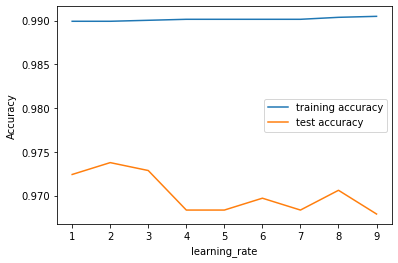

In [64]:
#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [66]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [71]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBoostLibraryNotFound: Cannot find XGBoost Library in the candidate path, did you install compilers and run build.sh in root path?
List of candidates:
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\xgboost.dll
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\../../lib/xgboost.dll
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\./lib/xgboost.dll
C:\ProgramData\Anaconda3\xgboost\xgboost.dll
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\../../windows/x64/Release/xgboost.dll
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\./windows/x64/Release/xgboost.dll

In [70]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [80]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [85]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    conda-22.9.0               |   py39hcbf5309_2         985 KB  conda-forge
    libxgboost-1.5.0           |       hd77b12b_2         1.3 MB
    py-xgboost-1.5.0           |   py39haa95532_2         156 KB
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-1.5.0              |   py39haa95532_2          15 KB
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0 None
  libxgboost         pk


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3





libxgboost-1.5.0     | 1.3 MB    | ###1       |  32% 
libxgboost-1.5.0     | 1.3 MB    | #####5     |  55% 
libxgboost-1.5.0     | 1.3 MB    | #######1   |  71% 
libxgboost-1.5.0     | 1.3 MB    | #########1 |  91% 
libxgboost-1.5.0     | 1.3 MB    | ########## | 100% 

_py-xgboost-mutex-2. | 11 KB     |            |   0% 
_py-xgboost-mutex-2. | 11 KB     | ########## | 100% 
_py-xgboost-mutex-2. | 11 KB     | ########## | 100% 

py-xgboost-1.5.0     | 156 KB    |            |   0% 
py-xgboost-1.5.0     | 156 KB    | ########## | 100% 
py-xgboost-1.5.0     | 156 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... failed


XGBoostLibraryNotFound: Cannot find XGBoost Library in the candidate path, did you install compilers and run build.sh in root path?
List of candidates:
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\xgboost.dll
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\../../lib/xgboost.dll
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\./lib/xgboost.dll
C:\ProgramData\Anaconda3\xgboost\xgboost.dll
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\../../windows/x64/Release/xgboost.dll
C:\Users\mathe\AppData\Roaming\Python\Python39\site-packages\xgboost\./windows/x64/Release/xgboost.dll

In [81]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.924,0.933,0.947,0.927
1,K-Nearest Neighbors,0.944,0.950,0.962,0.996
2,Support Vector Machine,0.957,0.963,0.982,0.966
3,Naive Bayes Classifier,0.583,0.420,0.291,0.996
4,Decision Tree,0.959,0.964,0.992,0.991
5,Random Forest,0.962,0.967,0.993,0.989
6,Gradient Boosting Classifier,0.971,0.975,0.992,0.985
7,CatBoost Classifier,0.972,0.976,0.994,0.987
8,CatBoost Classifier,0.972,0.976,0.994,0.987


In [90]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [91]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,CatBoost Classifier,0.972,0.976,0.994,0.987
1,CatBoost Classifier,0.972,0.976,0.994,0.987
2,Gradient Boosting Classifier,0.971,0.975,0.992,0.985
3,Random Forest,0.962,0.967,0.993,0.989
4,Decision Tree,0.959,0.964,0.992,0.991
5,Support Vector Machine,0.957,0.963,0.982,0.966
6,K-Nearest Neighbors,0.944,0.950,0.962,0.996
7,Logistic Regression,0.924,0.933,0.947,0.927
8,Naive Bayes Classifier,0.583,0.420,0.291,0.996


In [ ]:
import pickle
pickle.dump(forest,open('Phishing '))